# Initial Exploration of Data

### 1. Introduction
This section covers the following steps:

- Importing required libraries.
- Defining necessary functions essential for this code file.
- Loading the available datasets (train and test).
- Inspecting feature data types.
- Analyzing the distribution of features and the target variable.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from functions import load_and_prepare_data

In [25]:
# New categorization to evaluate also 'good' experiences/ evaluate three types of experiences
def categorize_cm_content(value):
    if value >= 80:
        return 'very good'
    elif value > 50:
        return 'good'
    else:
        return 'bad'
    
def plot_pair_plot(df, columns: list, hue: str, palette: str = "deep"):
    
    all_columns = columns + [hue]
    missing_columns = [col for col in all_columns if col not in df.columns]

    # Raise error if some columns given are not in the DataFrame
    if missing_columns:
        raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")
    
    # Create the pairplot
    pairplot = sns.pairplot(data=df[all_columns], hue=hue, palette=palette)
    pairplot.fig.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, wspace=0.2, hspace=0.2)
    plt.show()

def plot_boxplot(df, columns):
    df_boxplot = df[columns]

    plt.figure(figsize=(14,6))
    sns.boxplot(data=df_boxplot,showfliers = True)
    plt.title('Box Plots')
    plt.show()

def plot_correlations(df: pd.DataFrame, columns_input: list = [], dday: str = 'dd0', method: str = 'pearson', threshold: float = 0.7):

    if columns_input:  # If columns_input is not empty
        df_corrs = df[columns_input].corr(method=method)
    elif isinstance(dday, str): 
        columns = [col for col in df.columns if dday in col.lower()]
        df_corrs = df[columns].corr(method=method)
    else:
        raise ValueError("You must provide either 'columns_input' or a valid 'dday'.")

    mask_upper = np.triu(np.ones_like(df_corrs, dtype=bool))
    mask = np.abs(df_corrs) < threshold
    final_mask = mask_upper | mask

    if np.all(final_mask):  # If no relevant correlations are found
        print("No correlations above the threshold to display.")
        return

    # Plot heatmap
    plt.subplots(figsize=(12, 8))
    sns.heatmap(df_corrs, square=True, annot=True, mask=final_mask, cmap="coolwarm")
    plt.show()

def plot_biovariable_across_ddays(df, variable_columns, categories: list, differentiation_days_list: list, title: str, y_limits: list = [], legend_categories: bool=True):

    x_axis = np.array(differentiation_days_list)
    plt.rcParams['font.size'] = 14

    # Plot for each category
    if 'very good' in categories:
        df_very_good = df.loc[df['Category'] == 'very good'][variable_columns]
        df_very_good = np.transpose(df_very_good) 
        for i in range(df_very_good.shape[1]):  # Iterate over rows
            plt.plot(x_axis, df_very_good.iloc[:, i], marker='o', linestyle='-', color='green')
        if legend_categories:
            plt.plot([], [], marker='o', linestyle='-', color='green', label='very good')  # Single label for a category
        plt.title(title + ' (very good observations)')
    
    if 'good' in categories:
        df_good = df.loc[df['Category'] == 'good'][variable_columns]
        df_good = np.transpose(df_good)
        for i in range(df_good.shape[1]):  # Iterate over rows
            plt.plot(x_axis, df_good.iloc[:, i], marker='o', linestyle='-', color='orange')  
        if legend_categories:
            plt.plot([], [], marker='o', linestyle='-', color='orange', label='good')  # Single label for a category
        plt.title(title + ' (good observations)')

    if 'bad' in categories:
        df_bad = df.loc[df['Category'] == 'bad'][variable_columns]
        df_bad = np.transpose(df_bad)
        for i in range(df_bad.shape[1]):  # Iterate over rows
            plt.plot(x_axis, df_bad.iloc[:, i], marker='o', linestyle='-', color='red')
        if legend_categories:
            plt.plot([], [], marker='o', linestyle='-', color='red', label='bad')  # Single label for a category
        plt.title(title + ' (bad observations)')

    if len(categories) >1:
        plt.title(title)

    if y_limits: # If limits for y axis are given by the user
        y_min = y_limits[0]
        y_max = y_limits[1]
        plt.ylim(y_min, y_max)
    
    plt.xticks(differentiation_days_list)
    plt.xlabel('Differentiation Days')
    plt.ylabel('Bioprocess Variable')
    if legend_categories:
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.show()

def get_txt_file(dataframe, cols, file_path):
    X = dataframe[cols]
    X = X.reset_index()
    X = X.drop('index', axis=1)
    X = X.rename_axis('Experiment')
    X.to_csv(file_path, sep='\t')

In [26]:
X, y = load_and_prepare_data()
X.head()

dd0 Cell Density  dd0-dd1 Cell Density Gradient  dd1 Cell Density  \
0             0.725                       0.213793              0.88   
1             0.650                       0.384615              0.90   
2             0.880                       0.022727              0.90   
3             0.785                       0.363057              1.07   
4             0.410                       0.975610              0.81   

   dd1-dd2 Cell Density Gradient  dd2 Cell Density  \
0                        0.19007          1.047261   
1                        0.19007          1.071063   
2                        0.19007          1.071063   
3                        0.19007          1.273374   
4                        0.19007          0.963956   

   dd2-dd3 Cell Density Gradient  dd3 Cell Density   \
0                      -0.040354              1.005   
1                       0.246426              1.335   
2                      -0.038338              1.030   
3                      -0.462059              0.685   
4                       1.778134              2.678   

   dd3-dd5 Cell Density Gradient  dd5 Cell Density  \
0                       0.810945             1.820   
1                       0.749064             2.335   
2                       0.611650             1.660   
3                       0.510949             1.035   
4                      -0.002987             2.670   

   dd5-dd7 Cell Density Gradient  ...  dd1 Lactate Concentration  \
0                      -0.144394  ...                     14.025   
1                      -0.144394  ...                     13.350   
2                      -0.144394  ...                     13.670   
3                      -0.144394  ...                     11.955   
4                      -0.376404  ...                     11.300   

   dd3 Lactate Concentration  dd5 Lactate Concentration  \
0                      2.090                     17.780   
1                      2.165                     17.105   
2                      1.775                     19.050   
3                      0.995                     16.430   
4                     15.100                     16.425   

   dd7 Lactate Concentration  dd0 Glucose Concentration  \
0                      5.935                     9.1800   
1                     12.510                     9.5200   
2                      7.210                     9.0275   
3                     14.295                     8.9950   
4                     14.455                     9.5475   

   dd1 Glucose Concentration  dd3 Glucose Concentration  \
0                      3.895                     9.8750   
1                      4.470                    10.1450   
2                      4.415                    10.2700   
3                      5.155                    10.2550   
4                      1.700                     0.0175   

   dd5 Glucose Concentration  dd7 Glucose Concentration     y  
0                      0.635                      7.555  75.7  
1                      1.010                      2.910  75.0  
2                      0.000                      6.745  55.6  
3                      2.270                      2.135  57.7  
4                      1.610                      1.065  63.0  

[5 rows x 103 columns]

In [27]:
# Check types of variables
unique_dtypes = X.dtypes.unique()
print(unique_dtypes)

[dtype('float64')]


In [28]:
# Check the distribution of data
desc_X = X.describe(include='all')
desc_X

dd0 Cell Density  dd0-dd1 Cell Density Gradient  dd1 Cell Density  \
count         60.000000                      60.000000         60.000000   
mean           0.726333                       0.306942          0.851463   
std            0.250183                       0.586726          0.235372   
min            0.295000                      -0.755274          0.290000   
25%            0.555000                      -0.039279          0.697125   
50%            0.670000                       0.239709          0.840000   
75%            0.897500                       0.521429          1.000000   
max            1.280000                       2.625000          1.360000   

       dd1-dd2 Cell Density Gradient  dd2 Cell Density  \
count                      60.000000          60.00000   
mean                        0.759819           1.44745   
std                         0.675301           0.47042   
min                        -0.392857           0.34000   
25%                         0.200316           1.15525   
50%                         0.672321           1.38000   
75%                         1.051010           1.79250   
max                         3.567308           2.40000   

       dd2-dd3 Cell Density Gradient  dd3 Cell Density   \
count                      60.000000          60.000000   
mean                        0.461963           1.903242   
std                         0.743174           0.586961   
min                        -0.462059           0.685000   
25%                         0.067512           1.395000   
50%                         0.245569           2.022500   
75%                         0.593039           2.285000   
max                         4.128648           3.000000   

       dd3-dd5 Cell Density Gradient  dd5 Cell Density  \
count                      60.000000         60.000000   
mean                       -0.062192          1.695008   
std                         0.338154          0.606149   
min                        -0.781250          0.490000   
25%                        -0.290455          1.212500   
50%                        -0.091430          1.640000   
75%                         0.131216          2.112500   
max                         0.810945          3.060000   

       dd5-dd7 Cell Density Gradient  ...  dd1 Lactate Concentration  \
count                      60.000000  ...                  60.000000   
mean                       -0.030869  ...                  13.263147   
std                         0.331125  ...                   2.431586   
min                        -0.794344  ...                   8.800000   
25%                        -0.239271  ...                  11.500000   
50%                        -0.083716  ...                  13.200000   
75%                         0.162875  ...                  14.068750   
max                         0.793750  ...                  19.590000   

       dd3 Lactate Concentration  dd5 Lactate Concentration  \
count                  60.000000                  60.000000   
mean                   14.983333                  14.678624   
std                     3.792930                   3.327453   
min                     0.995000                   5.900000   
25%                    14.616667                  12.182500   
50%                    16.150000                  14.752500   
75%                    16.572500                  17.500000   
max                    18.730000                  20.375000   

       dd7 Lactate Concentration  dd0 Glucose Concentration  \
count                  60.000000                  60.000000   
mean                   13.037513                   9.814893   
std                     3.320086                   1.007209   
min                     5.900000                   7.135000   
25%                    11.090000                   9.162500   
50%                    13.187500                   9.520000   
75%                    15.391250                  10.502500   
max                    

In [29]:
# Get columns of representative variables
cols_representative = ['dd1 Cell Density', 'dd5 Aggregate Size ', 'Preculture Time [h]', 'dd0 DO 2nd derivative/cell count', 'dd1 Average pH', 'dd2 Average pH']

desc_X_to_show = desc_X.loc[:,cols_representative]
X_described_rounded = desc_X_to_show.round(4)
X_described_rounded

dd1 Cell Density  dd5 Aggregate Size   Preculture Time [h]  \
count           60.0000              60.0000              60.0000   
mean             0.8515             201.7790              48.7083   
std              0.2354              89.5176               2.5115   
min              0.2900             115.7712              45.0000   
25%              0.6971             161.9928              48.0000   
50%              0.8400             184.2421              48.0000   
75%              1.0000             209.1120              48.0000   
max              1.3600             754.7499              56.0000   

       dd0 DO 2nd derivative/cell count  dd1 Average pH  dd2 Average pH  
count                           60.0000         60.0000         60.0000  
mean                          -238.1035          6.9493          6.7828  
std                            671.6414          0.3167          0.2122  
min                          -3410.5002          5.1540          5.9886  
25%                           -380.5510          6.8858          6.7086  
50%                            -40.9293          6.9673          6.8163  
75%                              2.2682          7.1092          6.8995  
max                           2190.0317          7.8681          7.3056

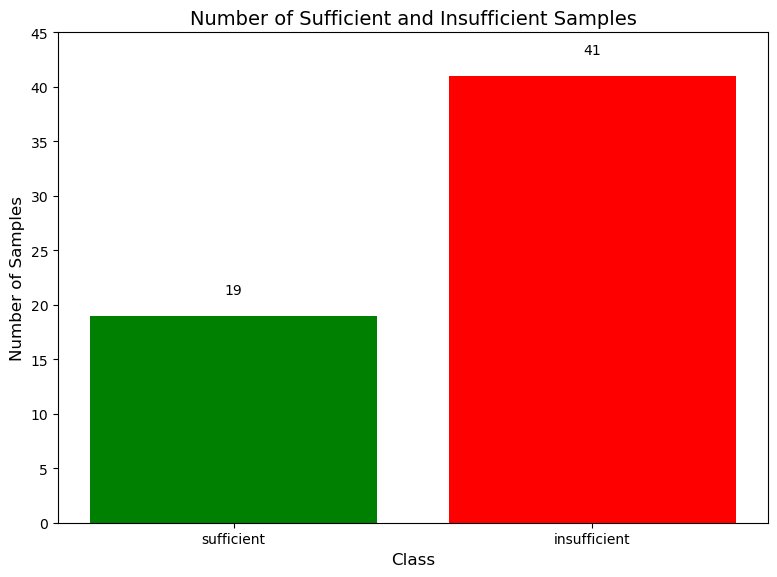

In [30]:
# Number of sufficient and insufficient data points (according to study by Williams et al. (2020))
num_suff = int(X[X['y'] >= 90].count().iloc[0])
num_insuff = int(X[X['y'] < 90].count().iloc[0])

classes = ['sufficient', 'insufficient']
vals = [num_suff, num_insuff]

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(classes, vals, color=['green', 'red'])

# Add labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Number of Sufficient and Insufficient Samples', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,45)

for i, val in enumerate(vals):
    plt.text(i, val + 2, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

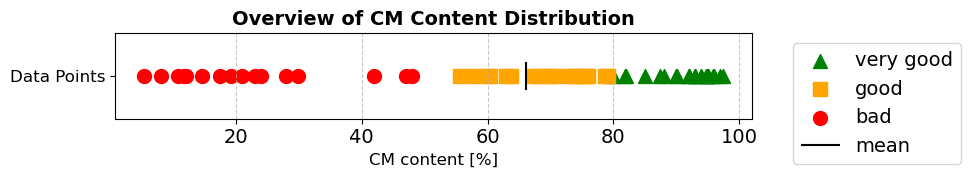

In [31]:
# Apply new categorization to X ('bad' (0-50), 'good' (50-80) and 'very good' (80-100))
X['Category'] = X['y'].apply(categorize_cm_content)
CM_content_mean = X['y'].mean() # calculate mean

# Define markers and colors for each category
markers = {'very good': '^', 'good': 's', 'bad': 'o'}
colors = {'very good': 'green', 'good': 'orange', 'bad': 'red'}

# Create figure
fig, ax = plt.subplots(figsize=(10, 2))

for category, marker in markers.items():
    subset = X[X['Category'] == category]
    ax.scatter(
        x=subset['y'],  
        y=np.zeros(len(subset)),
        label=f'{category}',
        marker=marker,
        color=colors[category],
        s=100
    )

ax.set_xlabel("CM content [%]", fontsize=12)
ax.set_yticks([0]) 
ax.set_yticklabels(['Data Points'], fontsize=12)
ax.set_title("Overview of CM Content Distribution", fontsize=14, weight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.vlines(x=CM_content_mean, ymin=-0.05, ymax=0.05, colors='black', label='mean')
ax.set_ylim(-0.15, 0.15)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [32]:
# Check the number of data points in each category
X['Category'].value_counts()

Category
very good    26
good         18
bad          16
Name: count, dtype: int64

### 2. Pairplots and Outlier Analysis

This section focuses on visualizing relationships between features and analyzing outliers:
- **Pairplots**: Visualizations of feature pairs are used to see whether different classes can be distinguished.
- **Boxplots**: These plots highlight feature distributions and identify potential outliers across different feature groups.
- **Outlier Removal**: Two distinct techniques for removing outliers are applied to the dataset, and their results are evaluated.

In [33]:
# Get columns for each property 
# Cell density
cell_density_cols = [col for col in X.columns if 'cell density' in col.lower()]
cell_density_cols = [col for col in cell_density_cols if 'gradient' not in col.lower()]

# Aggregate Size
aggregate_size_cols = [col for col in X.columns if 'aggregate' in col.lower()]
aggregate_size_cols = [col for col in aggregate_size_cols if 'gradient' not in col.lower()]

# DO concentration
DO_cols = [col for col in X.columns if 'average do concentration' in col.lower()]
DO_cols = [col for col in DO_cols if 'gradient' not in col.lower()]
DO_cols = [col for col in DO_cols if '2nd derivative' not in col.lower()]

# Average pH
pH_cols = [col for col in X.columns if 'average ph' in col.lower()]
pH_cols = [col for col in pH_cols if 'gradient' not in col.lower()]
pH_cols.remove('Overall Average pH')
# pH_cols.remove('d0 Average pH')
# pH_cols.remove('d1 Average pH')

# Glucose and Lactate
glucose_concentration_cols = [col for col in X.columns if 'glucose concentration' in col.lower()]
lactate_concentration_cols = [col for col in X.columns if 'lactate concentration' in col.lower()]

# Cell density gradient
cell_density_gradient_cols = [col for col in X.columns if 'cell density gradient' in col.lower()]

# Aggregate Size Gradient
aggregate_size_gradient_cols = [col for col in X.columns if 'aggregate size gradient' in col.lower()]
aggregate_size_gradient_cols.remove('Overall aggregate size gradient')

# DO concentration gradient
DO_gradient_cols = [col for col in X.columns if 'average do concentration gradient' in col.lower()]

# Average pH gradient
pH_gradient_cols = [col for col in X.columns if 'average ph gradient' in col.lower()]

# DO 2nd derivative
DO_2nd_derivative_cols = [col for col in X.columns if '2nd derivative do' in col.lower()]

# DO/ cell count
DO_CC_cols = [col for col in X.columns if 'do concentration/cell count' in col.lower()]

# DO gradient/ cell count
DO_gradient_CC_cols = [col for col in X.columns if 'do gradient/cell count' in col.lower()]

# DO 2nd derivative/ cell count
DO_2nd_derivative_CC_cols = [col for col in X.columns if '2nd derivative/cell count' in col.lower()]

# Other features
other_cols = ['Preculture Time [h]', 'Start Preculture Perfusion [h after inoc] d1-d2', 'Presence of  IWP2 [h]', 'Overall Average pH',
              'Overall density gradient', 'Overall aggregate size gradient']

/Users/carmoribeiro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


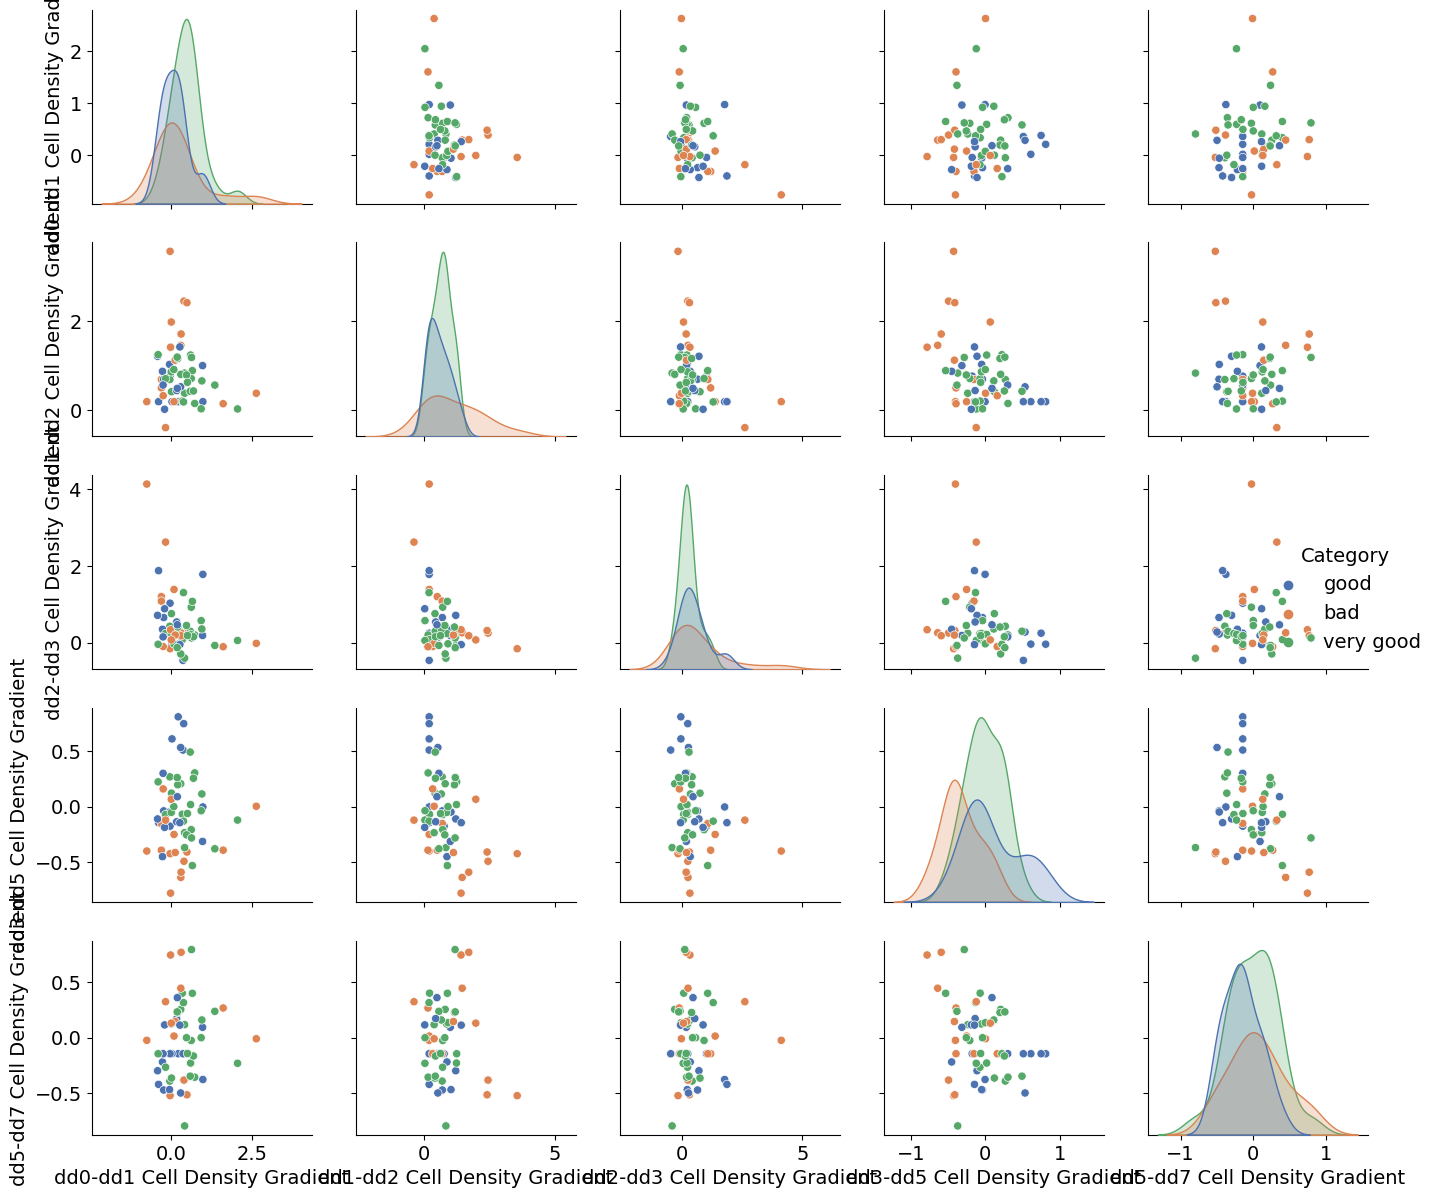

In [34]:
# Pair plot example
plot_pair_plot(df = X, columns=cell_density_gradient_cols, hue = 'Category')

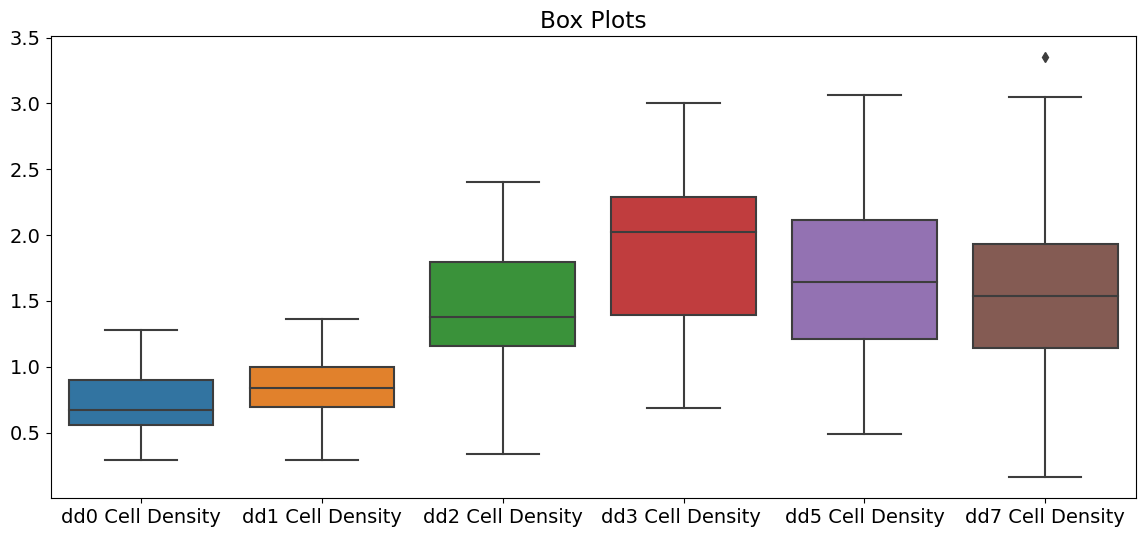

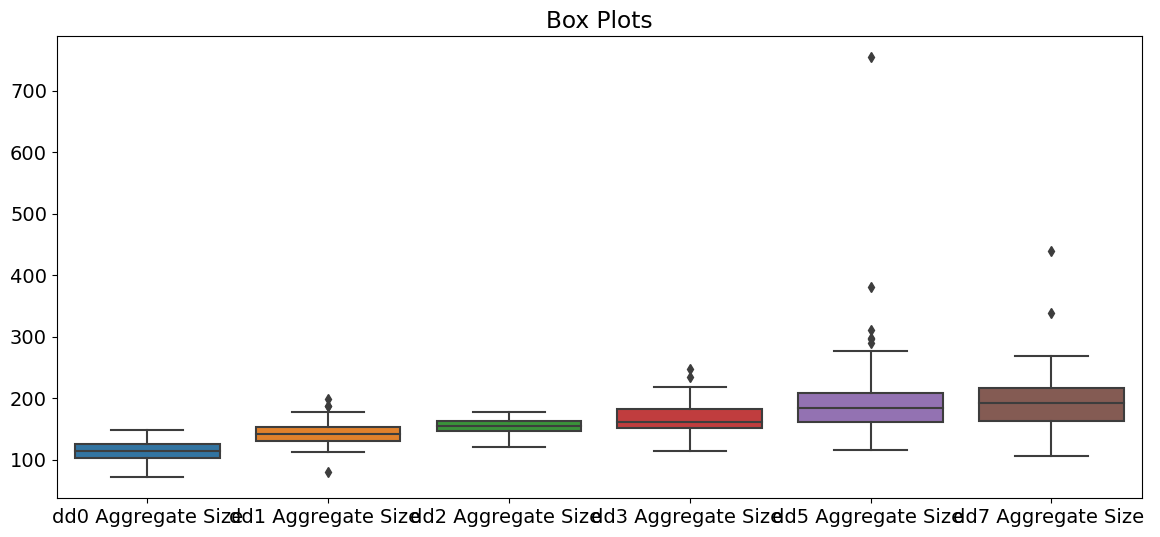

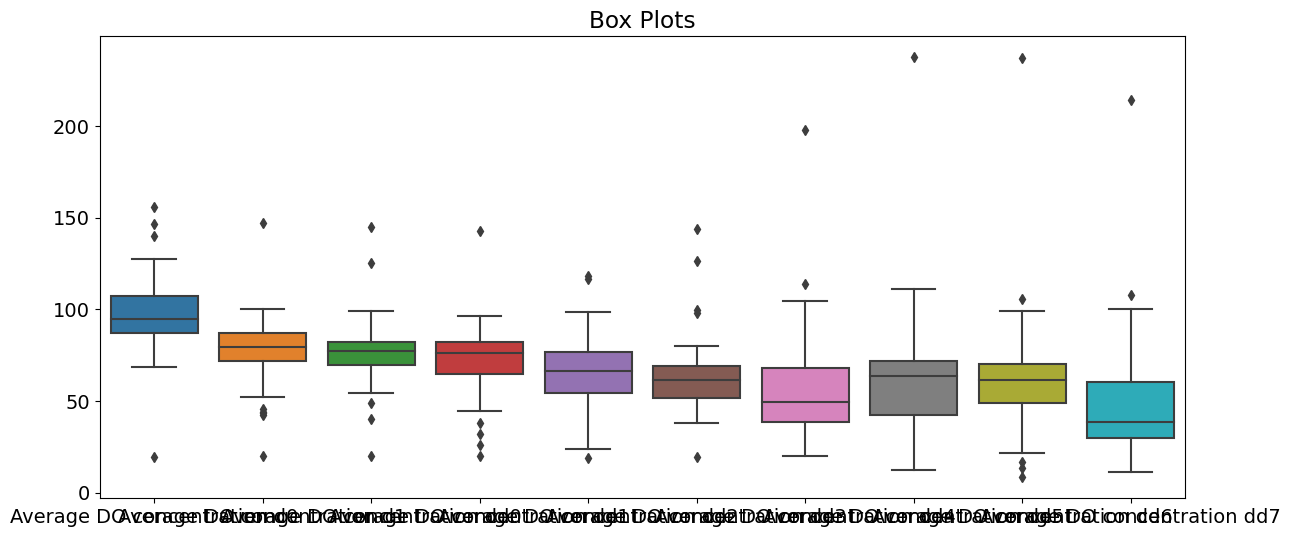

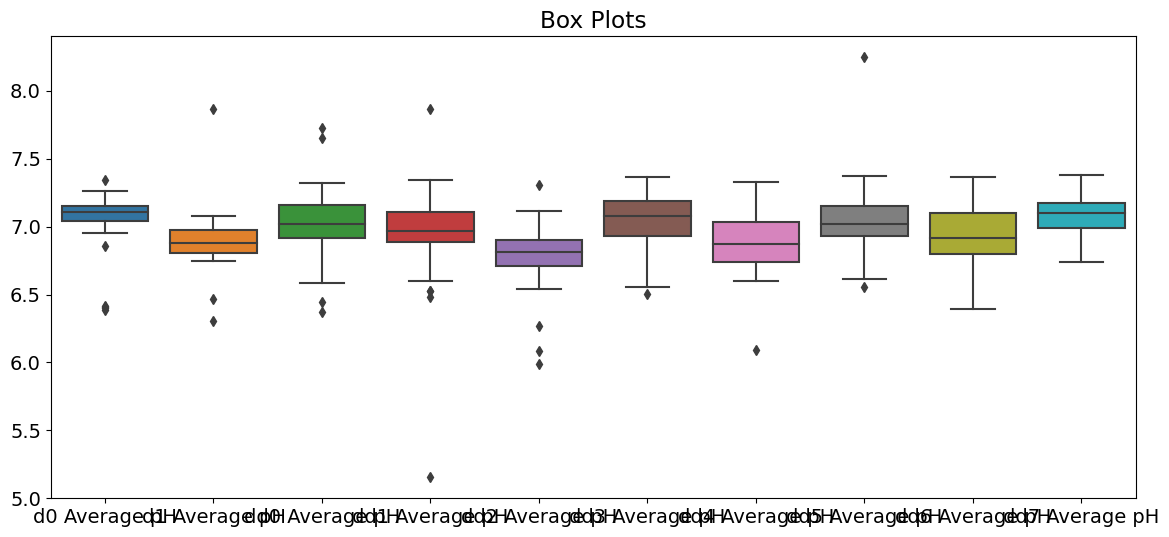

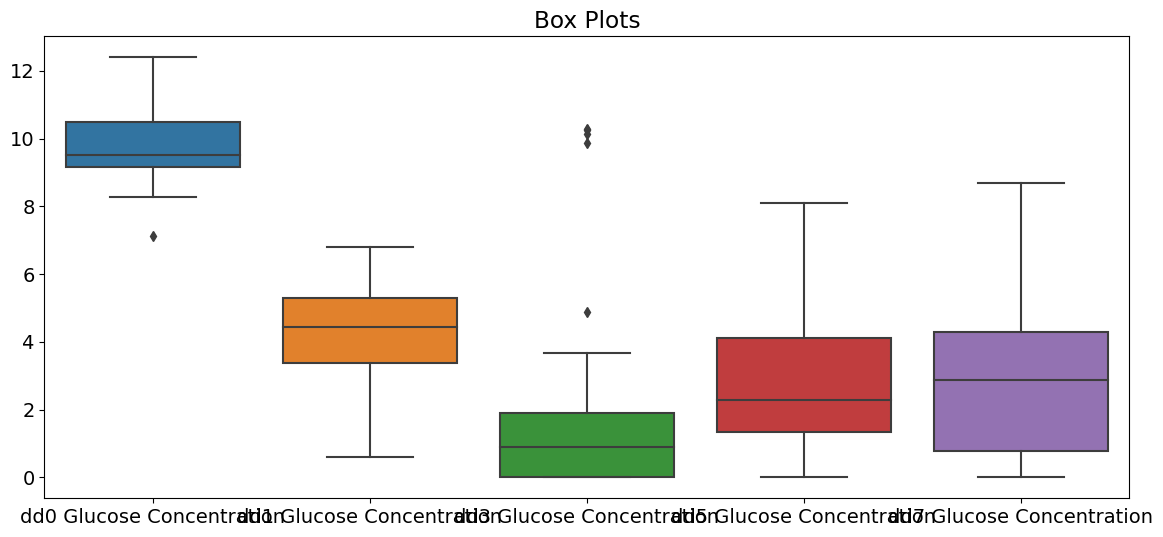

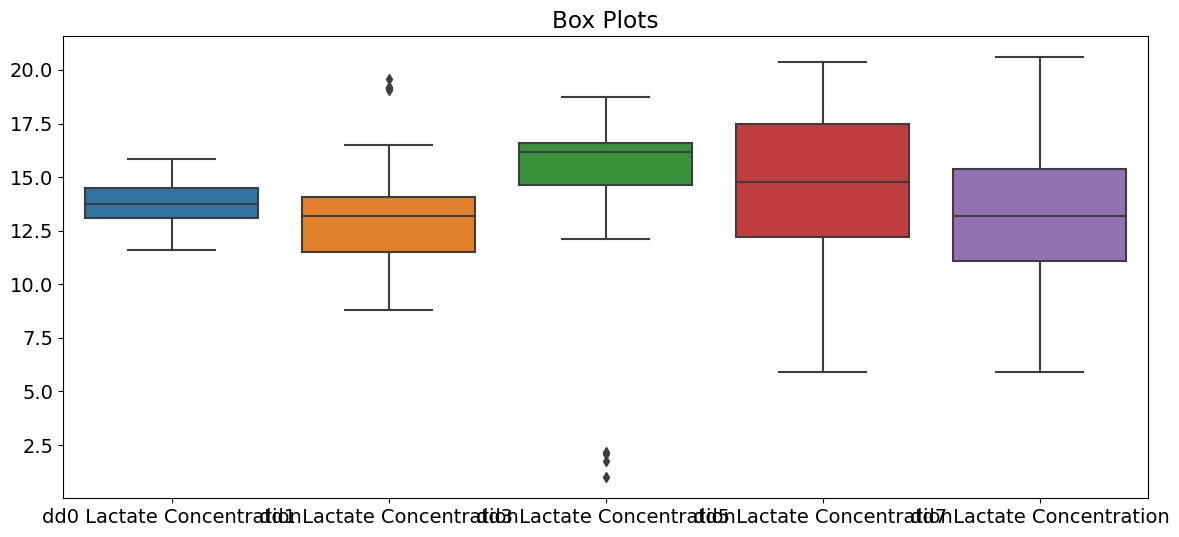

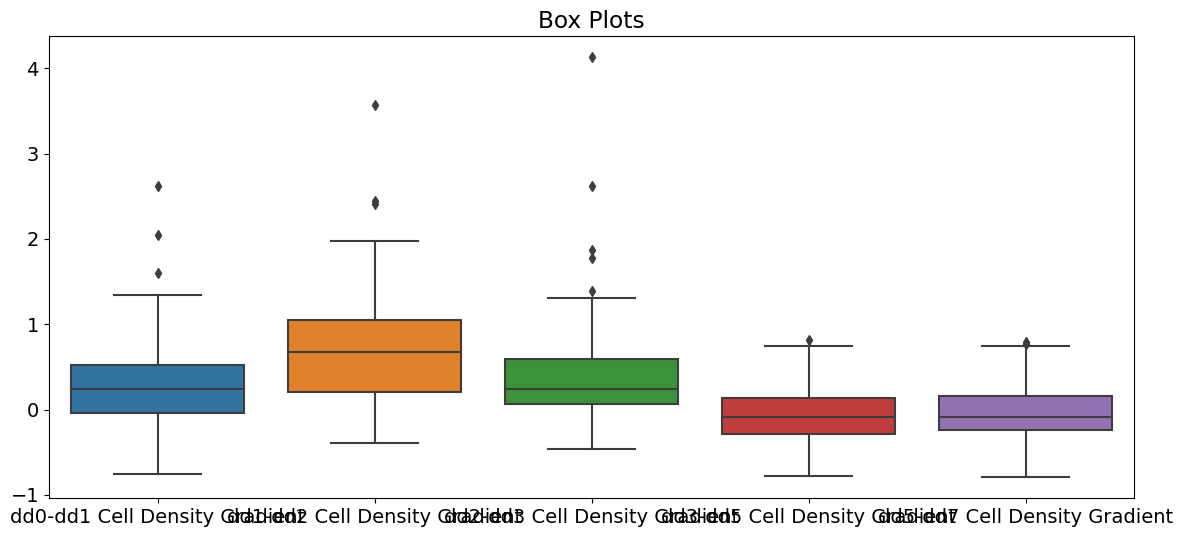

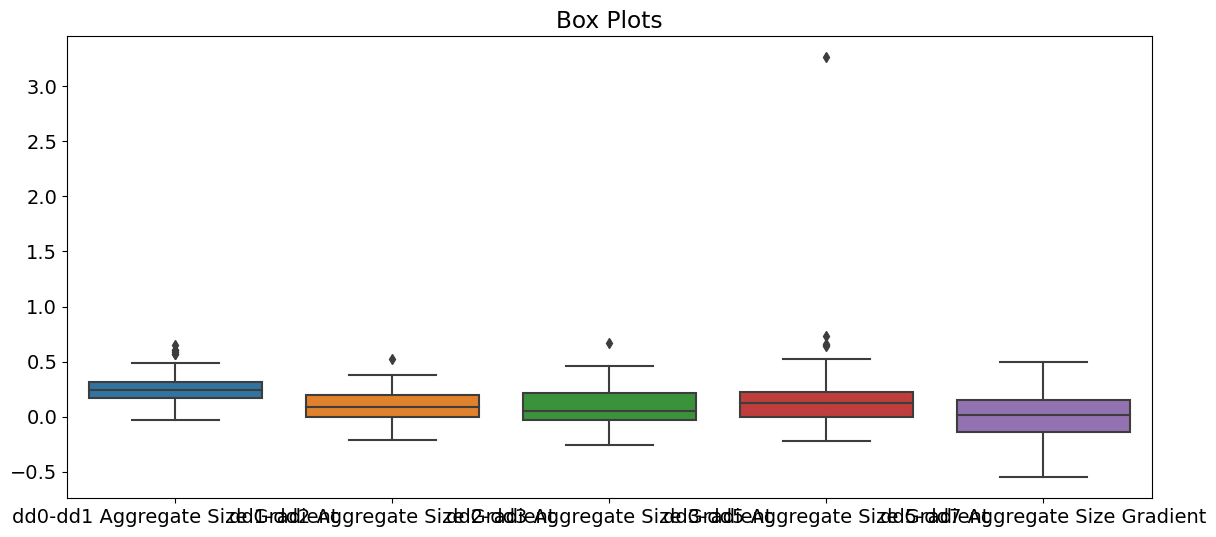

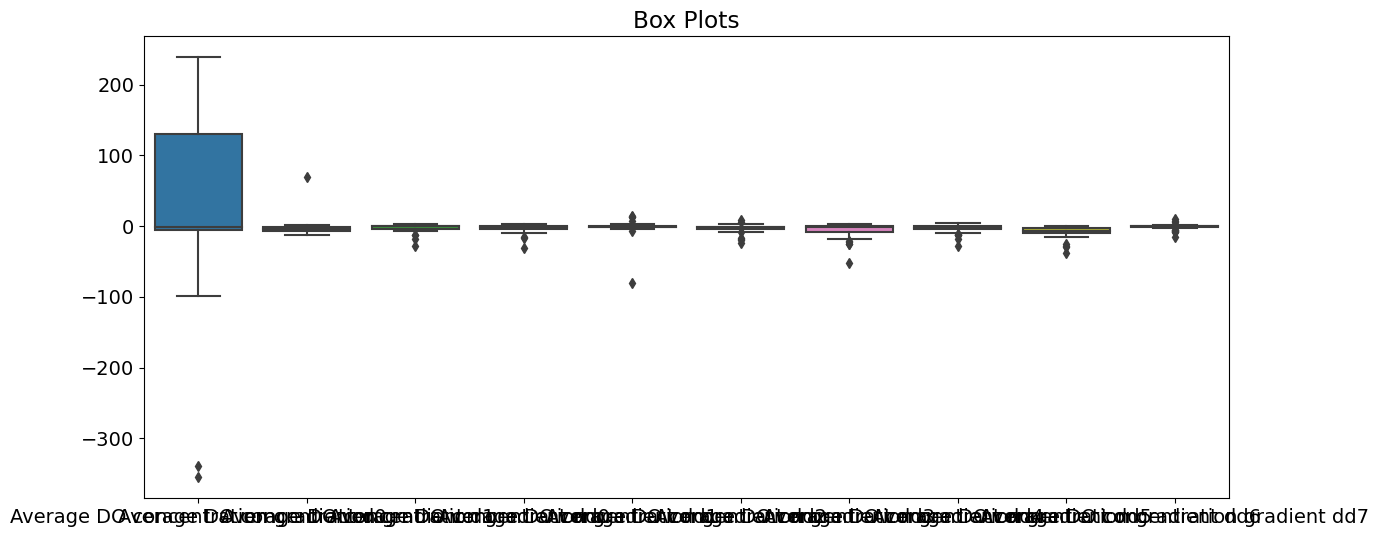

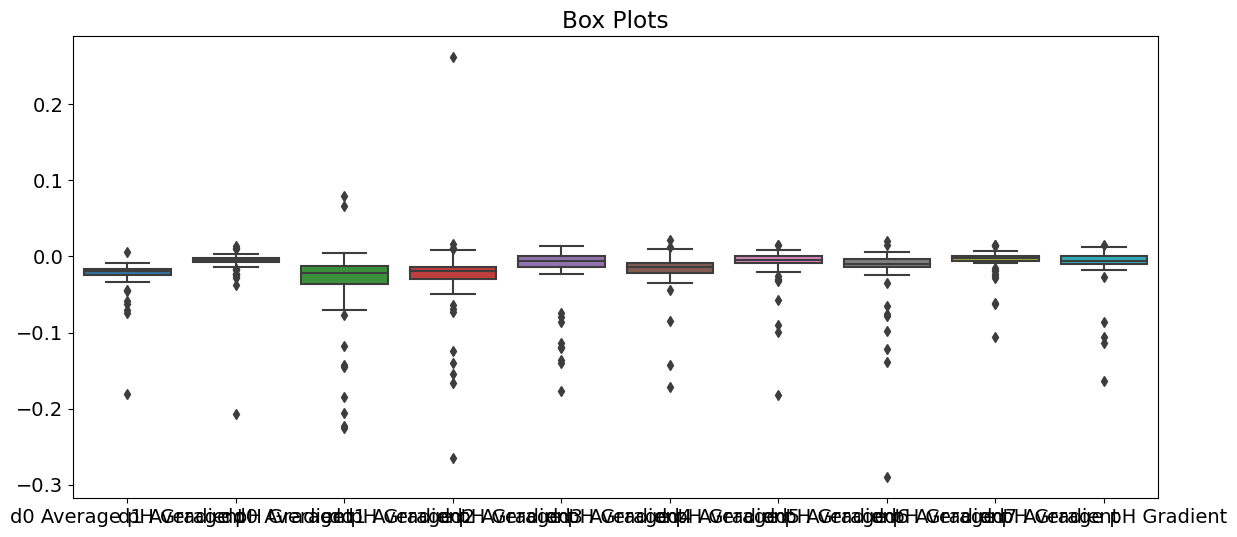

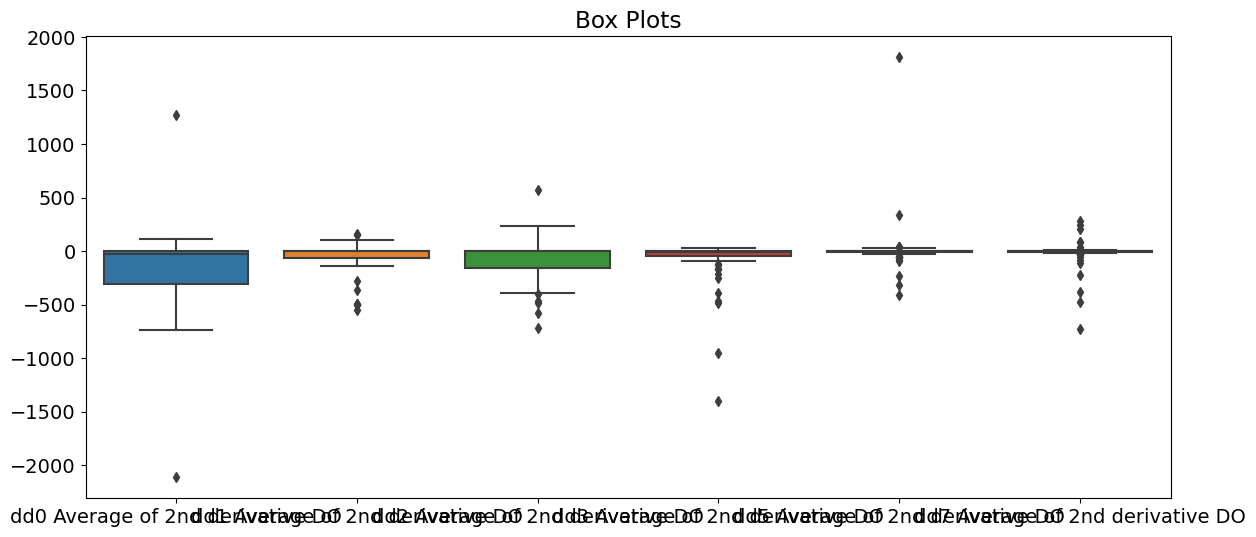

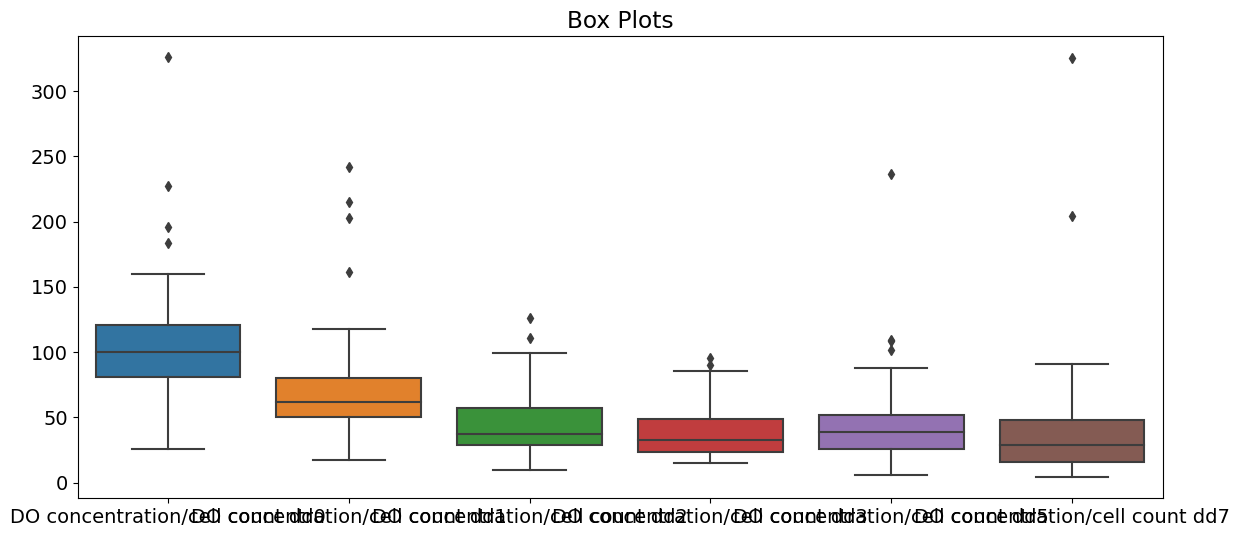

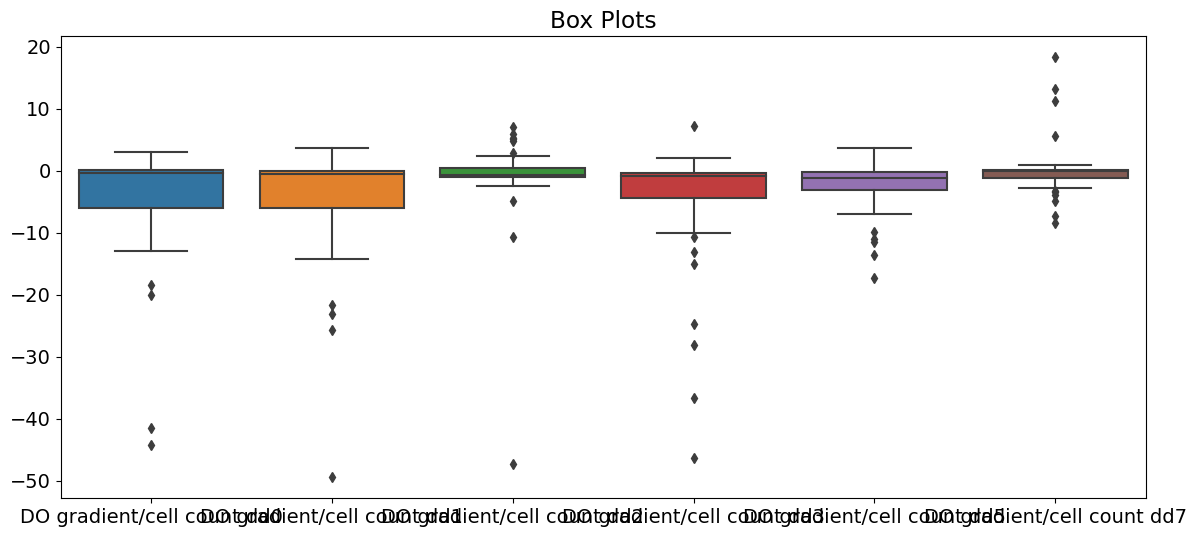

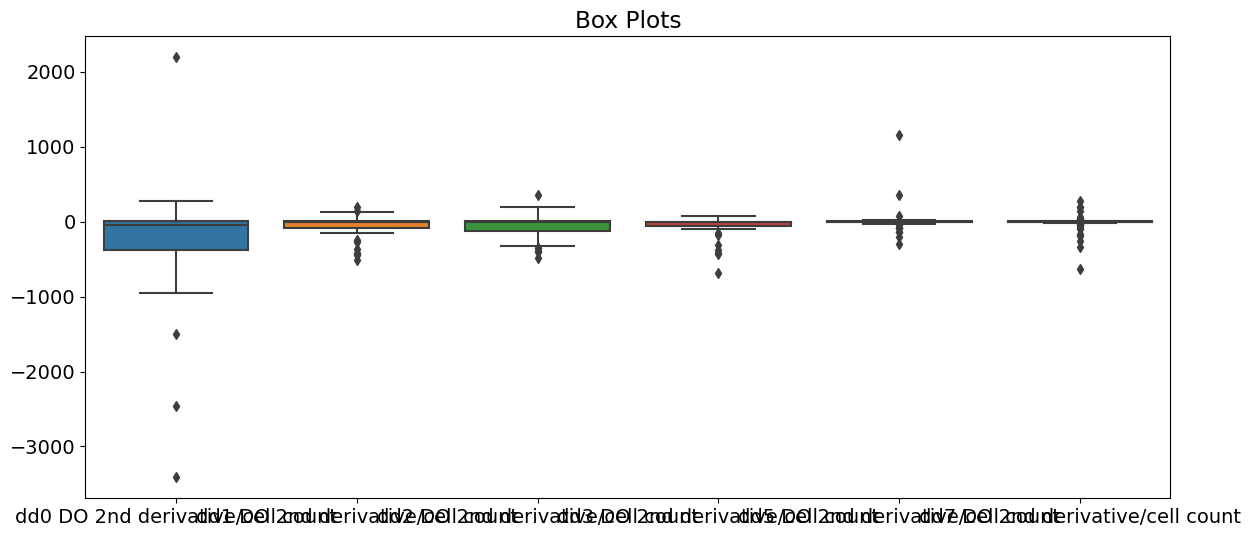

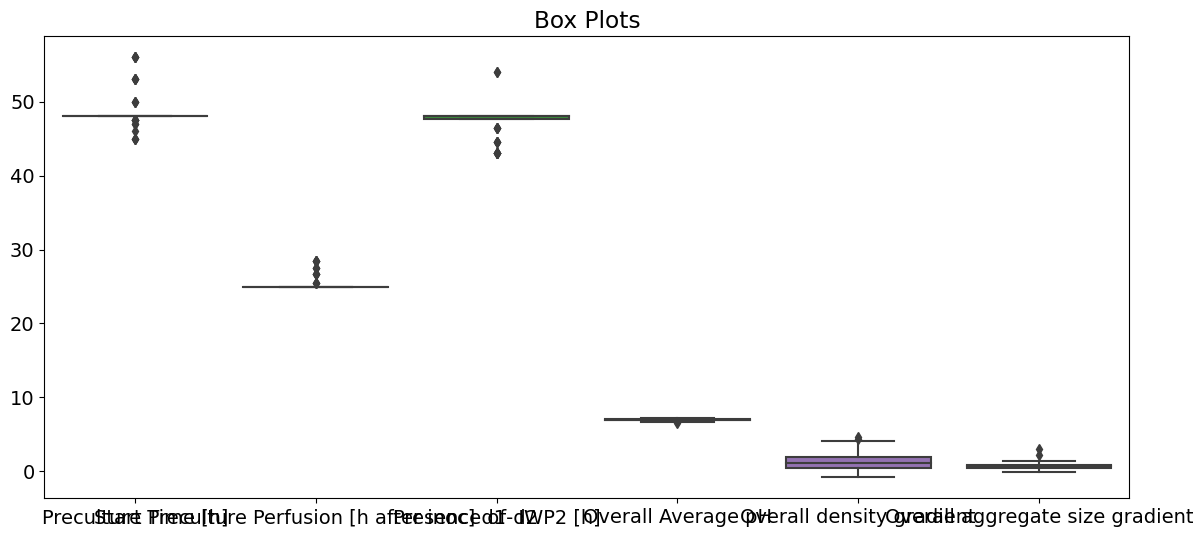

In [35]:
# List with all column groups of the DataFrame
list_of_column_groups = [cell_density_cols, aggregate_size_cols, DO_cols, pH_cols, glucose_concentration_cols, lactate_concentration_cols, 
                         cell_density_gradient_cols, aggregate_size_gradient_cols, DO_gradient_cols, pH_gradient_cols, DO_2nd_derivative_cols,
                         DO_CC_cols, DO_gradient_CC_cols, DO_2nd_derivative_CC_cols, other_cols]

for i in list_of_column_groups:
    plot_boxplot(df=X, columns=i)

In [36]:
X_filtered1 = X.copy()

for col in X_filtered1.columns:
   if col == 'Category':
      pass
   else: 
      Q1 = X_filtered1[col].quantile(0.25)
      Q3 = X_filtered1[col].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR

      # Using the interquartile range to remove outliers
      X_filtered1 = X_filtered1[(X_filtered1[col] >= lower_bound) & (X_filtered1[col] <= upper_bound)]

print('X filtered dimensions:', X_filtered1.shape)

X filtered dimensions: (3, 104)


In [37]:
# Removing outliers using
# z_score = (x - mean)/ std
threshold_z_score = 3 

X_filtered2 = X.copy()
X_filtered2 = X_filtered2.drop('Category', axis = 1)
X_filtered2.columns

X_filtered2 = X_filtered2[(np.abs(zscore(X_filtered2)) < threshold_z_score).all(axis=1)]
print('X filtered dimensions:', X_filtered2.shape)

X filtered dimensions: (24, 103)


### 3. Correlation Analysis
This section performs a detailed correlation analysis of the features of the dataset:

- Correlation coefficients are calculated between features from the same differentiation day.
- The highest correlation values are summarized and documented in a markdown cell for reference.

In [38]:
X_for_corr = X.drop('Category', axis=1)
num_features = X_for_corr.shape[1] - 1 # Remove output y

# Number of all possible combinations for the correlation coefficients
n_all_combinations_coeffs = num_features* (num_features-1)/2
print('Number of combinations between all features:', int(n_all_combinations_coeffs))

Number of combinations between all features: 5151


Correlations for features correponding to dd0


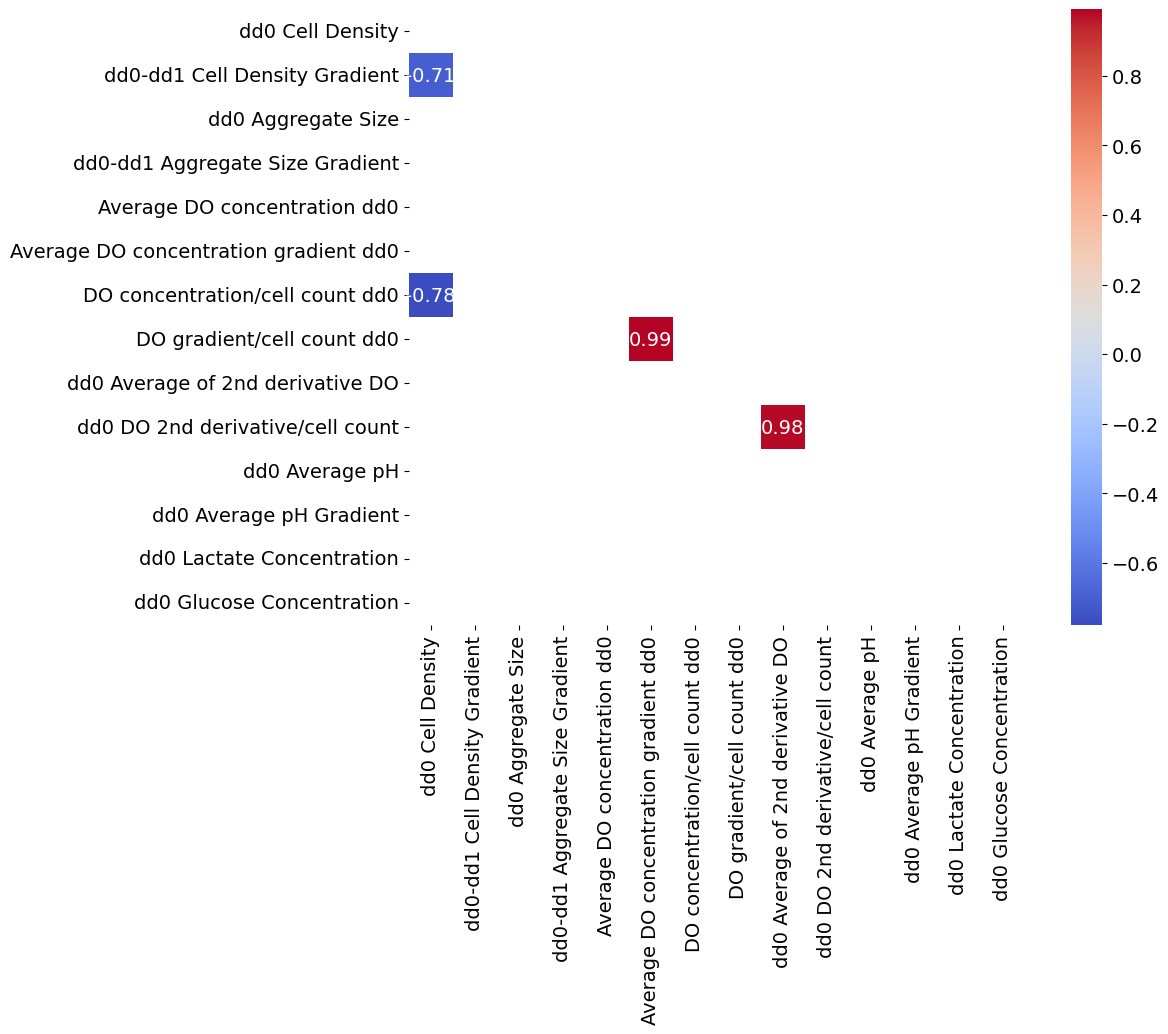

Correlations for features correponding to dd1


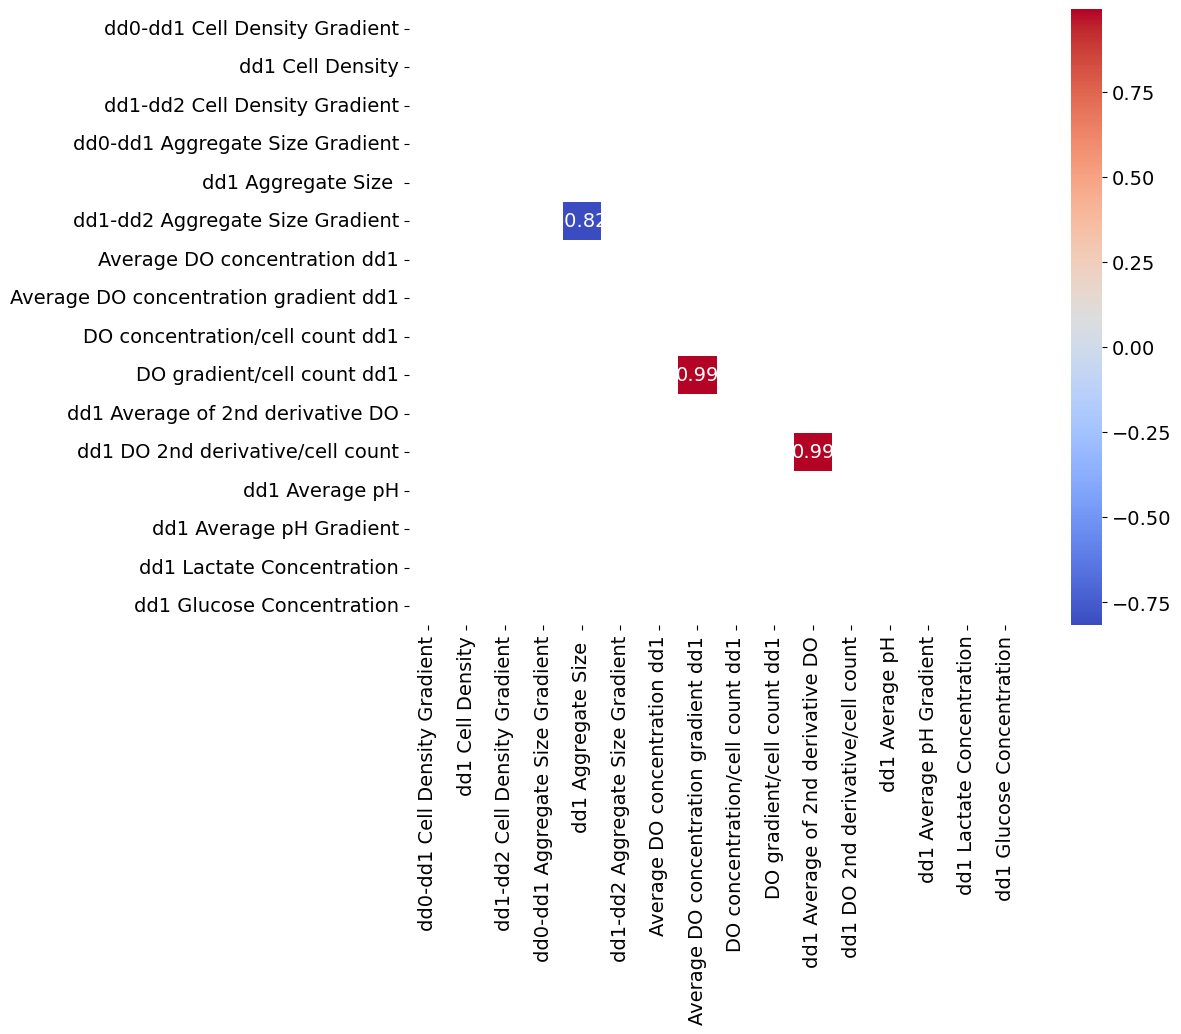

Correlations for features correponding to dd2


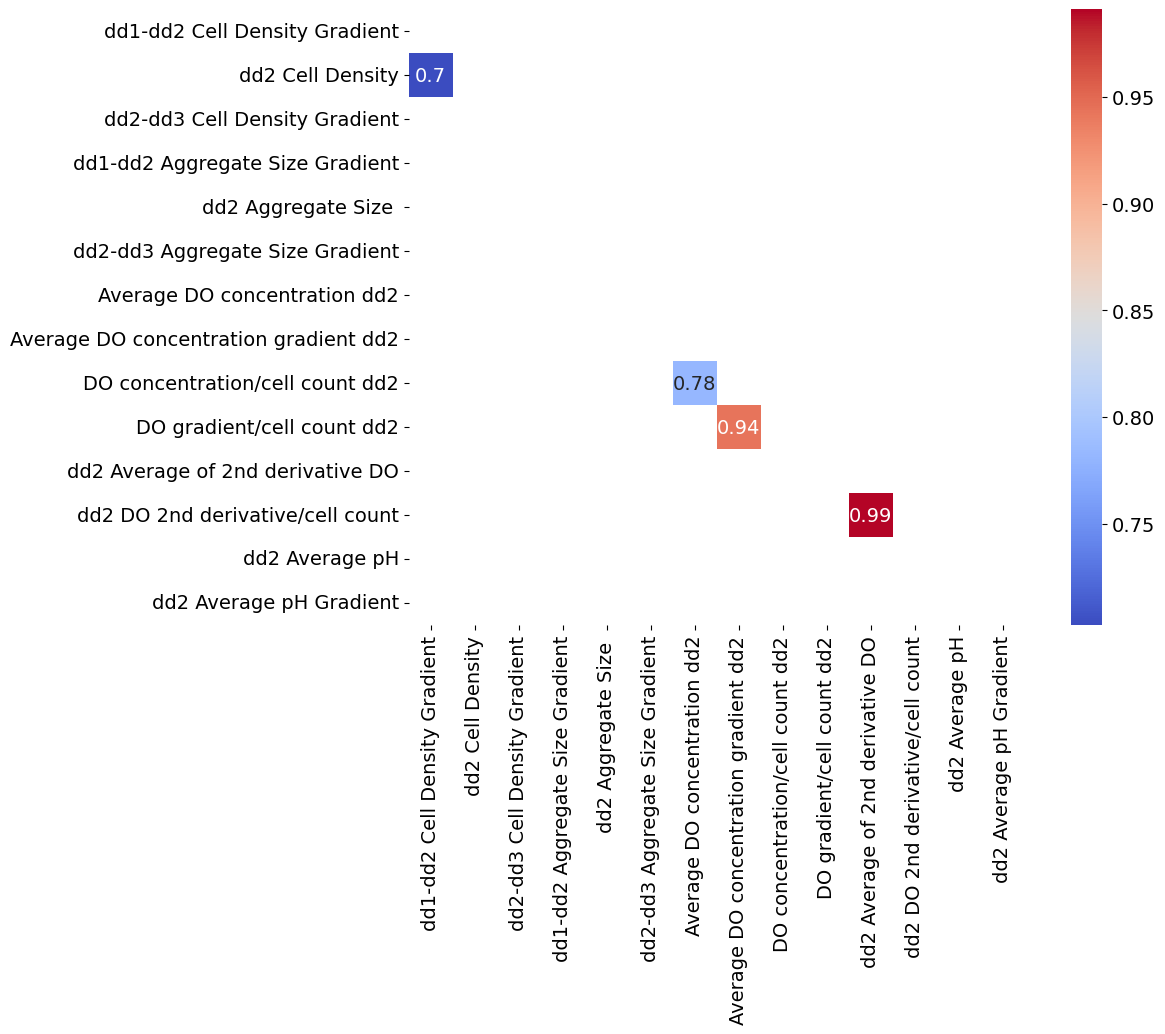

Correlations for features correponding to dd3


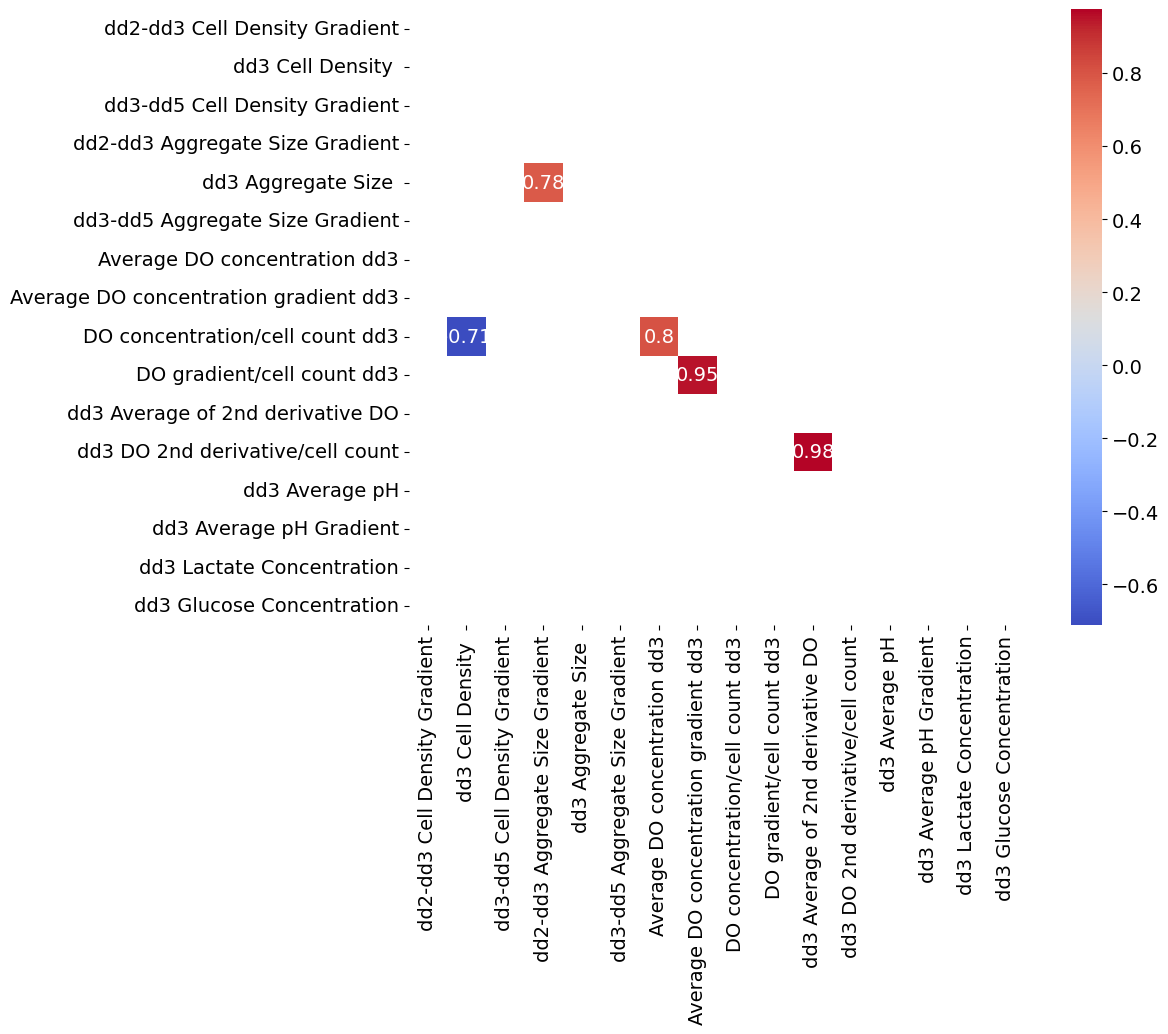

Correlations for features correponding to dd4
No correlations above the threshold to display.
Correlations for features correponding to dd5


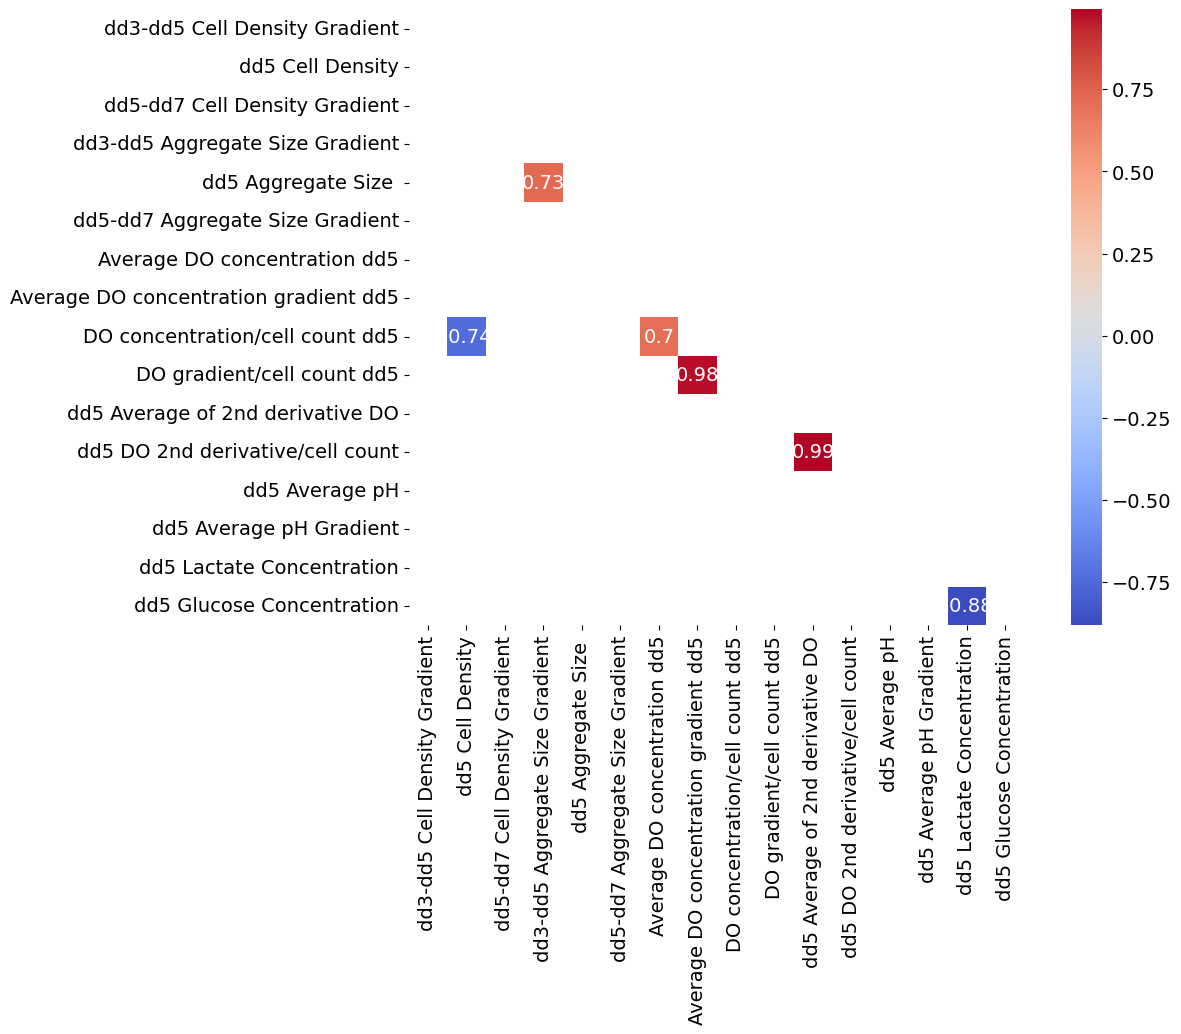

Correlations for features correponding to dd6
No correlations above the threshold to display.
Correlations for features correponding to dd7


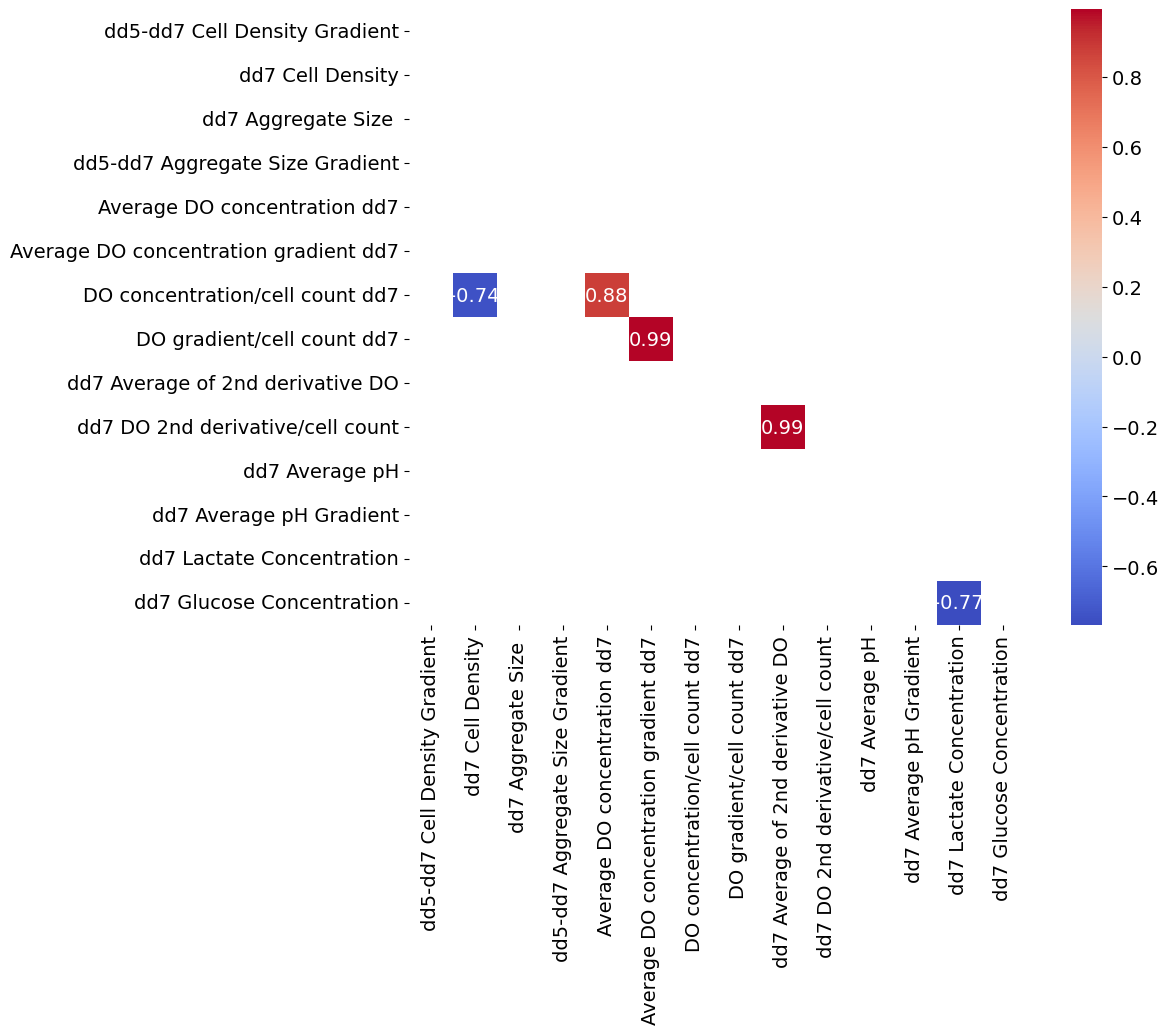

In [39]:
ddays_list_of_strings = ['dd0', 'dd1', 'dd2', 'dd3', 'dd4', 'dd5', 'dd6', 'dd7']

# Correlation coefficients for features from the same differentiation day
for i in ddays_list_of_strings:
    print('Correlations for features correponding to', i)
    plot_correlations(df= X, dday=i, method='spearman') # expect non-linear, but monotonic relationships

Features that reavealed high correlation values (high negative or positive correlations), in the same day 

dd0:
- dd0 Cell Density: dd0-dd1 Cell Density gradient (**-0.71**)
- dd0 Cell Density: DO concentration/cell count dd0 (**-0.78**)
- Average DO gradient dd0: DO gradient/cell count dd0 (**0.99**)
- 2nd derivative DO dd0: 2nd derivative DO dd0/cell count (**0.98**)

dd1: 
- dd1-dd2 aggregate size gradient: dd1 aggregate size (**-0.82**)
- DO gradient dd1: DO gradient/cell count dd1 (**0.99**)
- 2nd derivative DO dd1: 2nd derivative DO dd1/cell count (**0.99**)

dd2: 
- dd2 cell density: dd1-dd2 Cell Density gradient (**0.7**)
- DO concentration dd2: DO concentration/cell count dd2 (**0.78**)
- Average DO gradient dd2: DO gradient/cell count dd2 (**0.94**)
- 2nd derivative DO dd2: 2nd derivative DO dd2/cell count (**0.99**)

dd3: 
- dd3 cell density: DO concentration/cell count dd3 (**-0.71**)
- dd3 aggregate size: dd2-dd3 aggregate size gradient (**0.78**)
- DO concentration/cell count dd3: DO gradient dd3 (**0.8**)
- Average DO gradient dd3: DO gradient/cell count dd3 (**0.95**)
- 2nd derivative DO dd3: 2nd derivative DO dd3/cell count (**0.98**)

dd5: 
- dd5 cell density: DO concentration/cell count dd5 (**-0.74**)
- dd5 aggregate size: dd3-dd5 aggregate size gradient (**0.73**)
- DO concentration/cell count dd5: DO gradient dd5 (**0.7**)
- Average DO gradient dd5: DO gradient/cell count dd5 (**0.98**)
- 2nd derivative DO dd5: 2nd derivative DO dd5/cell count (**0.99**)
- dd5 glucose concentration: dd5 lactate concentration (**-0.88**)

dd7:
- dd7 cell density: DO concentration/cell count dd7 (**-0.74**)
- DO concentration/cell count dd7: DO concentration dd7 (**0.88**)
- Average DO gradient dd7: DO gradient/cell count dd7 (**0.99**)
- 2nd derivative DO dd7: 2nd derivative DO dd7/cell count (**0.99**)
- dd7 glucose concentration: dd7 lactate concentration (**-0.77**)

### 4. Evolution of Properties Over Time During Differentiation

This section visualizes the progression of the different biological properties across the differentiation days.
Distinct colors are used to represent each of the three categories, allowing for differentiation between them.

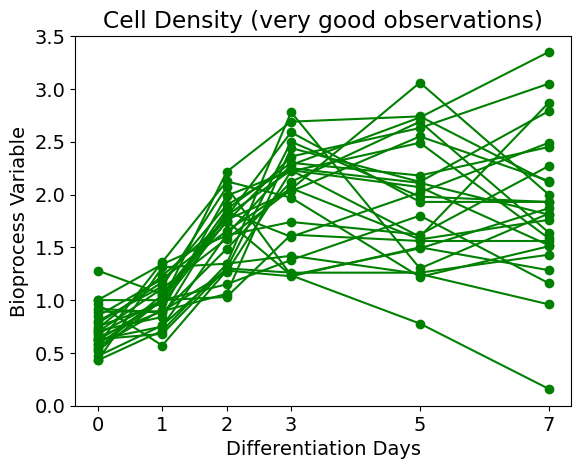

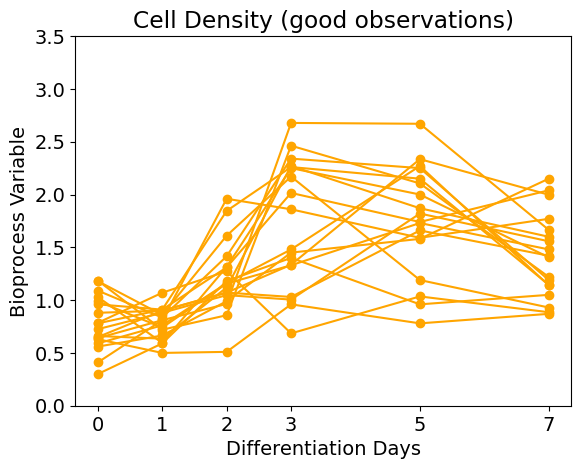

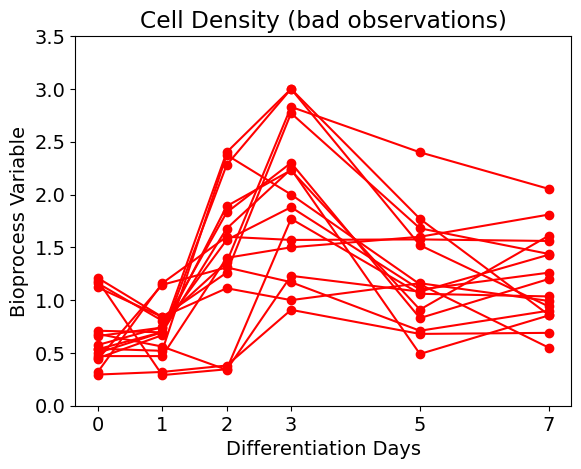

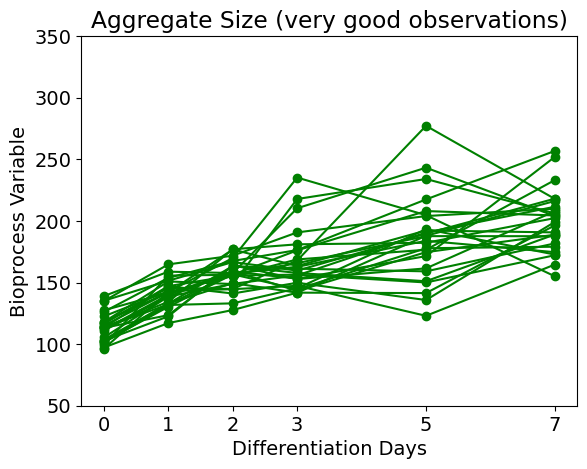

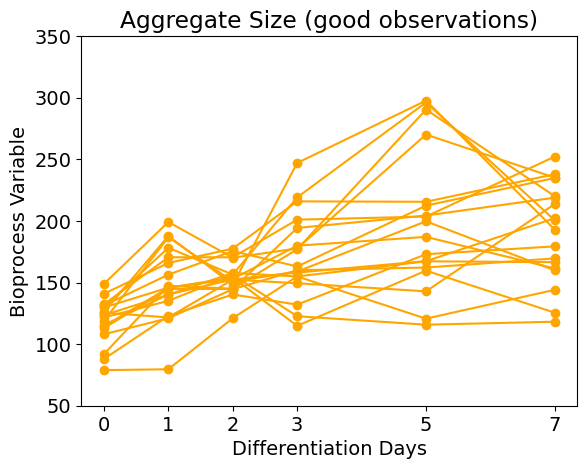

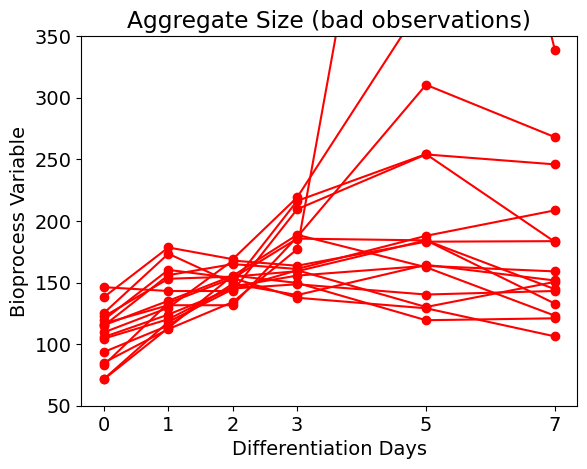

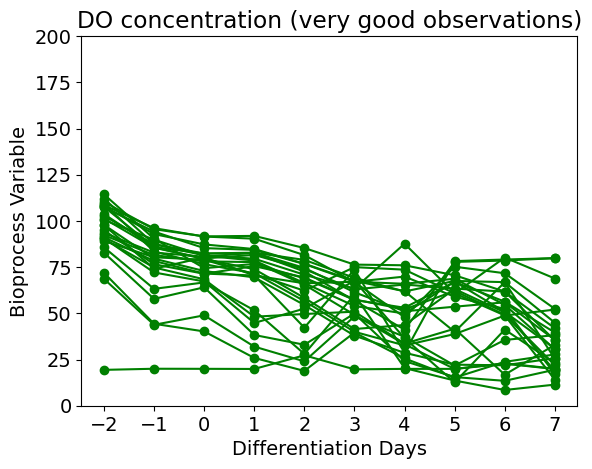

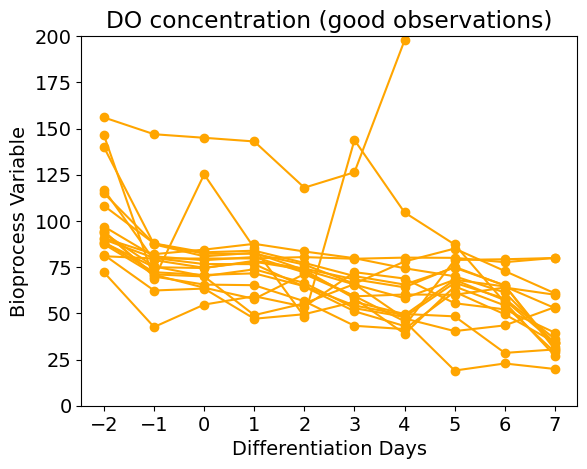

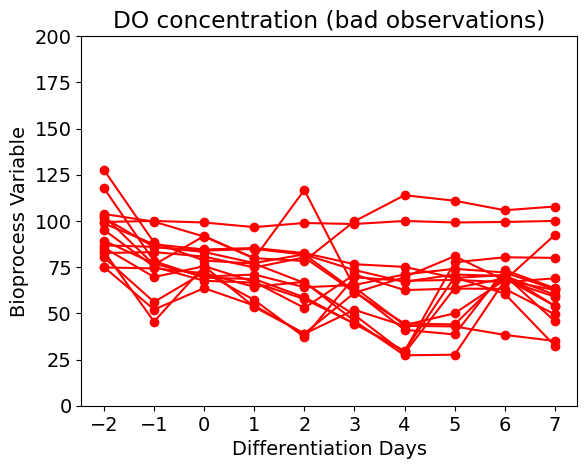

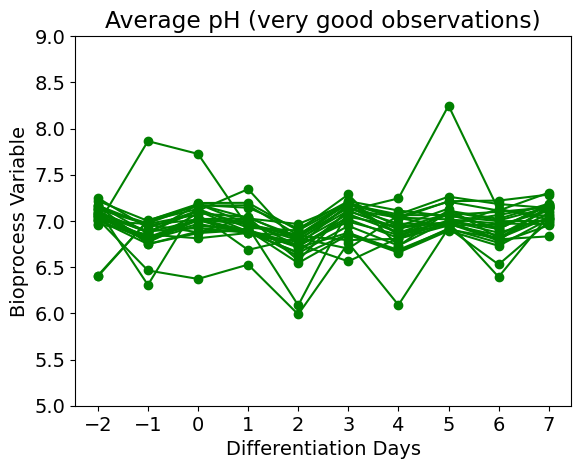

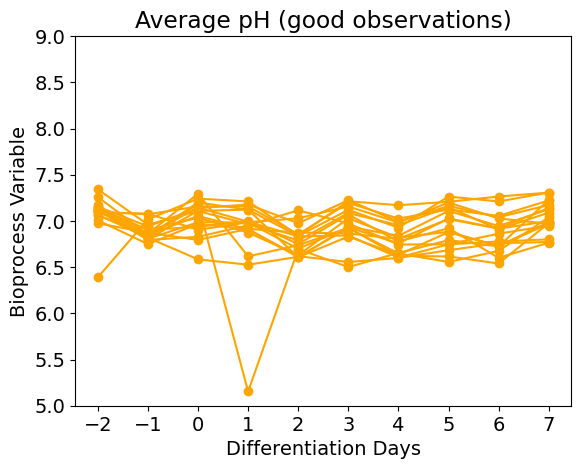

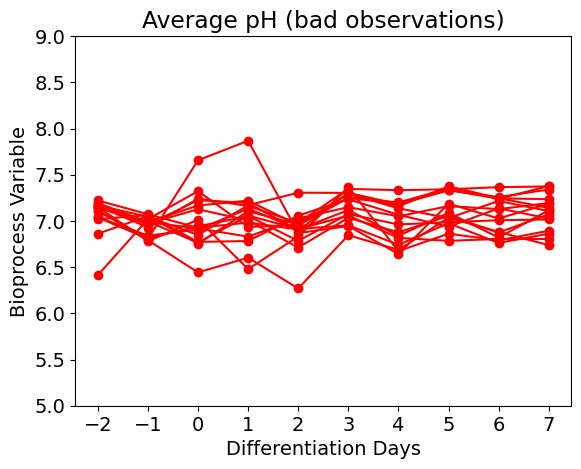

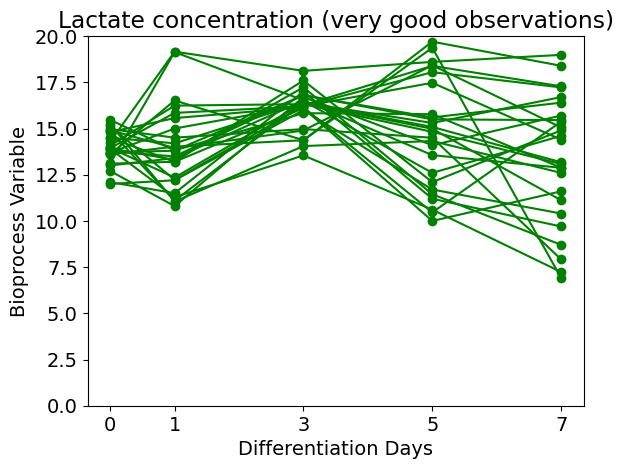

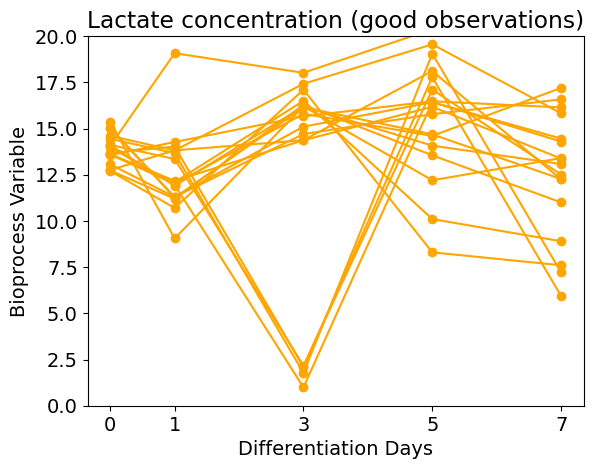

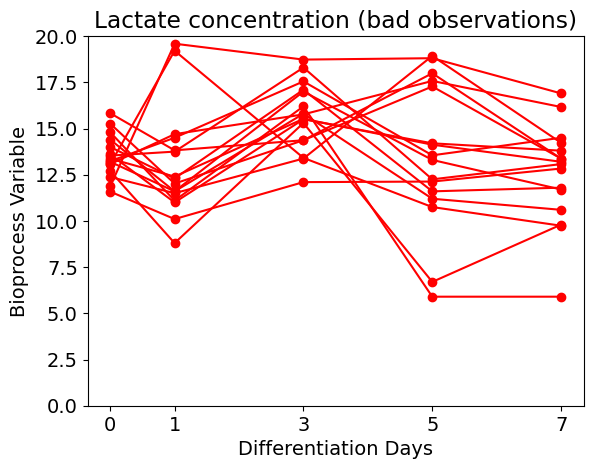

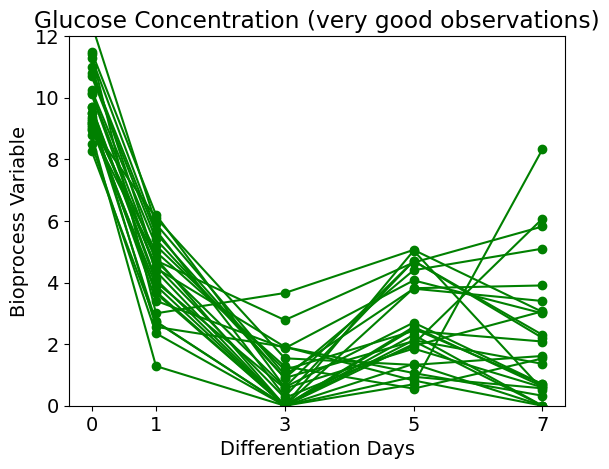

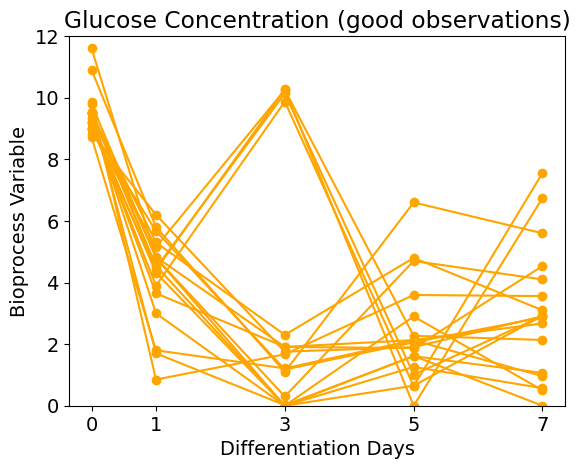

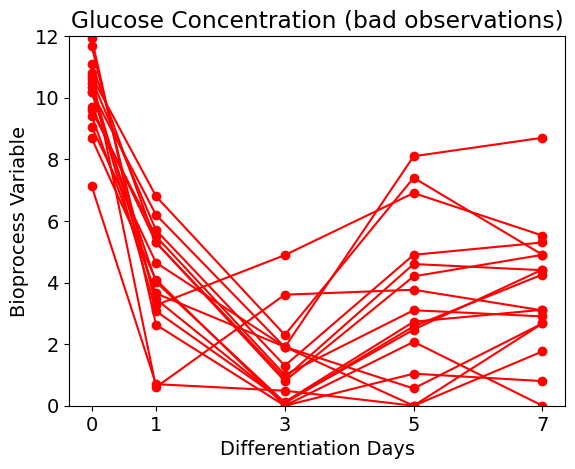

In [40]:
# Plot properties across differentiation days
categories_list = [['very good'], ['good'], ['bad']]
diff_days_list = [[0,1,2,3,5,7], [0,1,2,3,5,7], [-2,-1,0,1,2,3,4,5,6,7], [-2,-1,0,1,2,3,4,5,6,7], [0,1,3,5,7], [0,1,3,5,7]]
titles_variables = ['Cell Density', 'Aggregate Size', 'DO concentration', 'Average pH', 'Lactate concentration', 'Glucose Concentration']
list_variable_columns = [cell_density_cols, aggregate_size_cols, DO_cols, pH_cols, lactate_concentration_cols, glucose_concentration_cols]
y_limits_lists = [[0,3.5],[50,350],[0,200],[5,9],[0,20],[0,12]]

for (var_cols, diff_days, title, y_limits) in zip(list_variable_columns, diff_days_list, titles_variables, y_limits_lists):
    for category in categories_list:
        plot_biovariable_across_ddays(df = X, variable_columns = var_cols, categories = category, differentiation_days_list = diff_days, title = title, legend_categories=False, y_limits=y_limits)

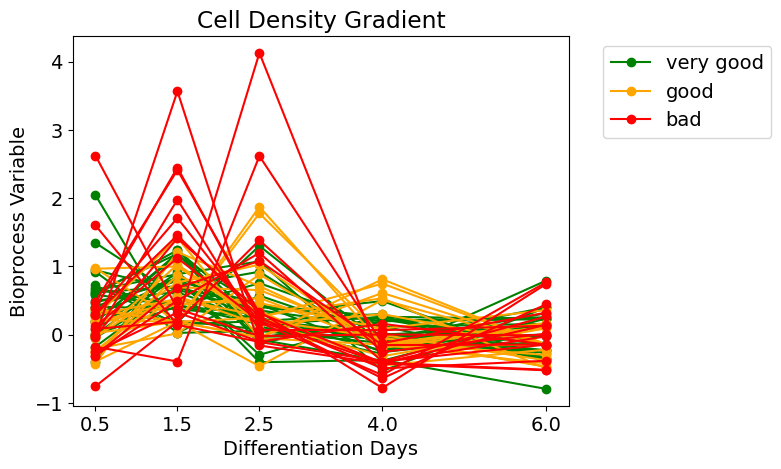

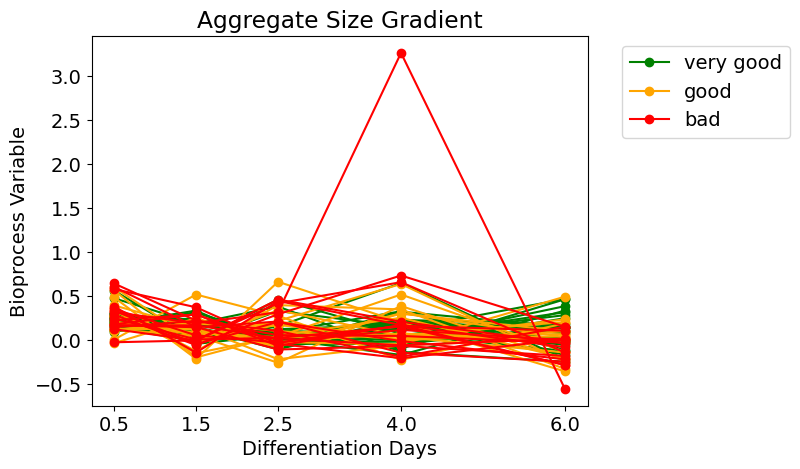

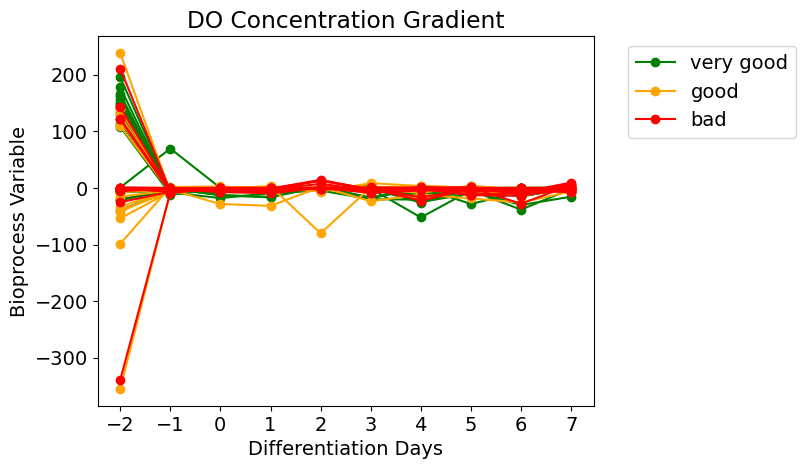

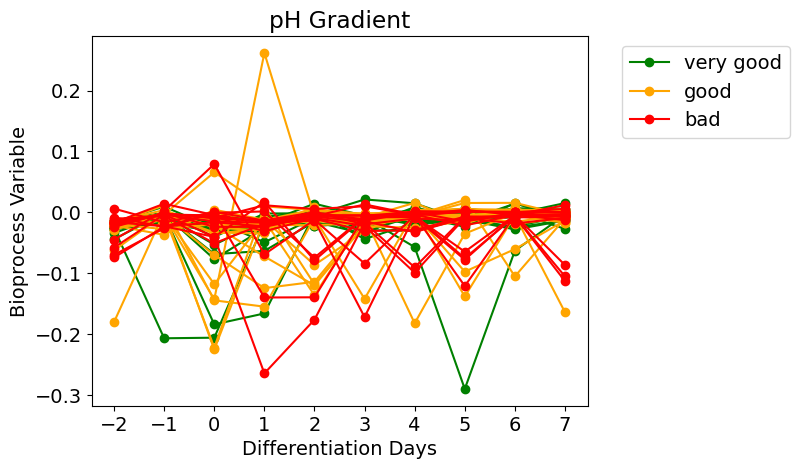

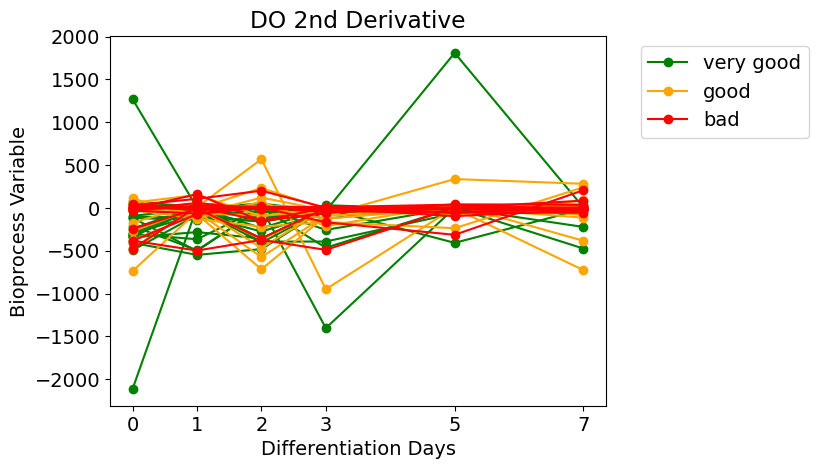

In [41]:
# Plot the gradient/ 2nd derivative features across differentiation days
categories_list = ['very good', 'good', 'bad']
diff_days_list_for_gradient_features = [[0.5,1.5,2.5,4,6], [0.5,1.5,2.5,4,6], [-2,-1,0,1,2,3,4,5,6,7], [-2,-1,0,1,2,3,4,5,6,7], [0,1,2,3,5,7]]
titles_gradient_variables = ['Cell Density Gradient', 'Aggregate Size Gradient', 'DO Concentration Gradient', 'pH Gradient', 'DO 2nd Derivative']
list_grad_variable_columns = [cell_density_gradient_cols, aggregate_size_gradient_cols, DO_gradient_cols, pH_gradient_cols, DO_2nd_derivative_cols]

for (var_cols, diff_days, title) in zip(list_grad_variable_columns, diff_days_list_for_gradient_features, titles_gradient_variables):
    plot_biovariable_across_ddays(df = X, variable_columns = var_cols, categories = categories_list, differentiation_days_list = diff_days, title = title)

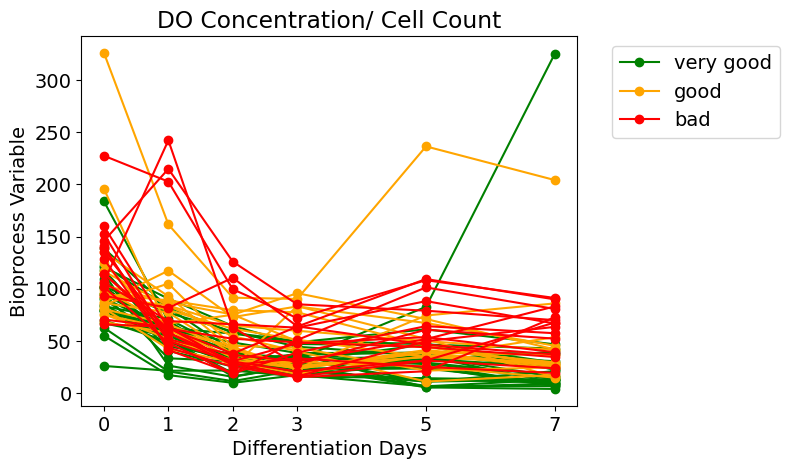

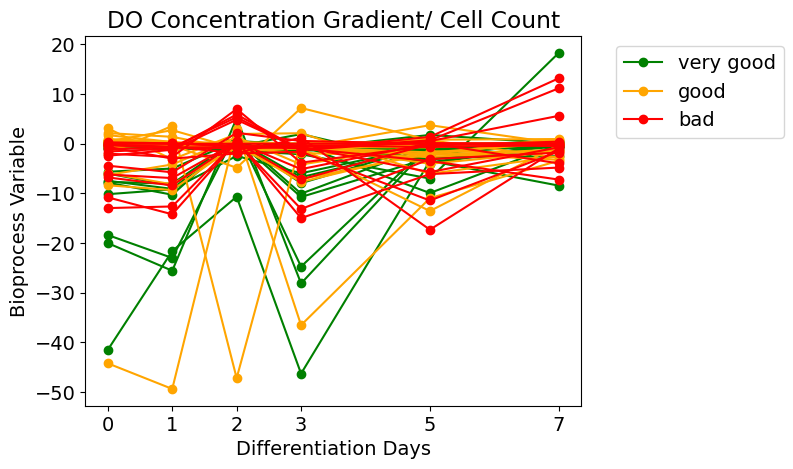

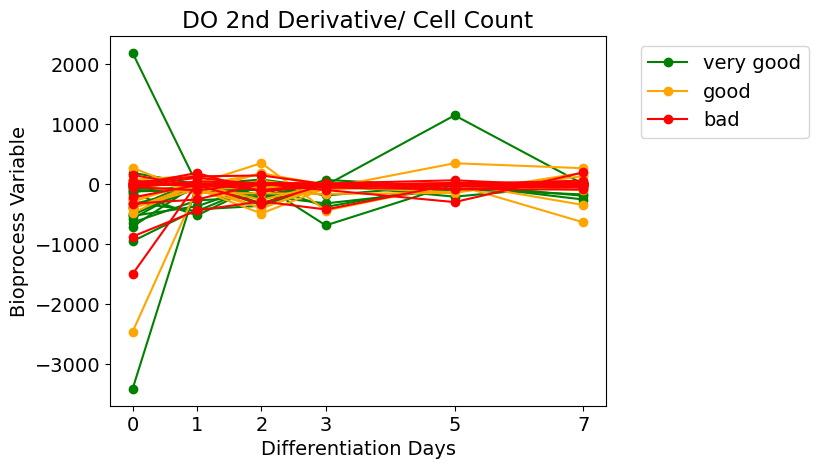

In [42]:
# Plot properties over cell count
categories_list = ['very good', 'good', 'bad']
diff_days_list_for_features_CC = [[0,1,2,3,5,7], [0,1,2,3,5,7], [0,1,2,3,5,7]]
titles_CC_variables = ['DO Concentration/ Cell Count', 'DO Concentration Gradient/ Cell Count', 'DO 2nd Derivative/ Cell Count']
list_CC_variable_columns = [DO_CC_cols, DO_gradient_CC_cols, DO_2nd_derivative_CC_cols]

for (var_cols, diff_days, title) in zip(list_CC_variable_columns, diff_days_list_for_features_CC, titles_CC_variables):
    plot_biovariable_across_ddays(df = X, variable_columns = var_cols, categories = categories_list, differentiation_days_list = diff_days, title = title)

### 5. Save files for Biclustering Analysis

In [43]:
get_txt_file(X, cell_density_cols, 'Datasets csvs/Cell_density.txt')
get_txt_file(X, aggregate_size_cols, 'Datasets csvs/Aggregate_size.txt')
get_txt_file(X, DO_cols, 'Datasets csvs/Average_DO.txt')
get_txt_file(X, pH_cols, 'Datasets csvs/Average_pH.txt')
get_txt_file(X, glucose_concentration_cols, 'Datasets csvs/Glucose_concentration.txt')
get_txt_file(X, lactate_concentration_cols, 'Datasets csvs/Lactate_concentration.txt')

get_txt_file(X, cell_density_gradient_cols, 'Datasets csvs/Cell_density_grad.txt')
get_txt_file(X, aggregate_size_gradient_cols, 'Datasets csvs/Aggregate_size_gradient.txt')
get_txt_file(X, DO_gradient_cols, 'Datasets csvs/DO_Gradient.txt')
get_txt_file(X, pH_gradient_cols, 'Datasets csvs/pH_Gradient.txt')
get_txt_file(X, DO_2nd_derivative_cols, 'Datasets csvs/DO_concentration_2ndDerivative.txt')

get_txt_file(X, DO_CC_cols, 'Datasets csvs/DO_concentration_cell_count.txt')
get_txt_file(X, DO_gradient_CC_cols, 'Datasets csvs/DO_gradient_cell_count.txt')
get_txt_file(X, DO_2nd_derivative_CC_cols, 'Datasets csvs/DO_2ndDerivative_cell_count.txt')

get_txt_file(X, 'y', 'Datasets csvs/CM_content_dd10.txt')